In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

## 1. Packages

In [5]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import netCDF4 as nc
import xarray as xr
import pandas as pd
import glob
import datetime as dttime
from scipy.signal import find_peaks
from numpy.polynomial import Polynomial as P
from scipy import fftpack
from scipy import signal

'Functions from local module:'
import tools_V13 as tl

## 2. Data

In [4]:
#Mesh
fnm = '/home/silvatol/Documents/Stage/Codes/Data/mesh_zgr_eNATL60pDYF_3.6_0-2500m.nc'
#fnm = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/mesh_zgr_eNATL60pDYF_3.6_0-2500m.nc'
dsm = xr.open_dataset(fnm)

#Temperature
fnT = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_votemper_0-2500m.nc'
#fnT = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_votemper_0-2500m.nc'
dsT = xr.open_dataset(fnT)

#Salinity
fnS = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vosaline_0-2500m.nc'
#fnS = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vosaline_0-2500m.nc'
dsS = xr.open_dataset(fnS)

#Density
fnD = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_sig0_0-2500m.nc'
#fnS = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_sig0_0-2500m.nc'
dsD = xr.open_dataset(fnD)

#U current velocity
fnU = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vozocrtx_0-2500m.nc'
#fnU = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vozocrtx_0-2500m.nc'
dsU = xr.open_dataset(fnU)

#Ug current velocity
fnUg = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_ugeo.nc'
#fnUg = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_ugeo.nc'
dsUg = xr.open_dataset(fnUg)

#V current velocity
fnV = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vomecrty_0-2500m.nc'
#fnV = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vomecrty_0-2500m.nc'
dsV = xr.open_dataset(fnV)

#Vg current velocity
fnVg = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vgeo.nc'
#fnVg = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vgeo.nc'
dsVg = xr.open_dataset(fnVg)

#U10 wind velocity
fnU10 = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_u10.nc'
#fnU10 = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_u10.nc'
dsU10 = xr.open_dataset(fnU10)

#V10 wind velocity
fnV10 = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_v10.nc'
#fnV10 = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_v10.nc'
dsV10 = xr.open_dataset(fnV10)

#Wind velocity module
fnW = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_wind10.nc'
#fnW = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_wind10.nc'
dsW = xr.open_dataset(fnW)

#Tau_x wind stress
fntau_x = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_sozotaux.nc'
#fnU10 = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_sozotaux.nc'
dstau_x = xr.open_dataset(fntau_x)

#Tau_y wind stress
fntau_y = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_sometauy.nc'
#fnU10 = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_sometauy.nc'
dstau_y = xr.open_dataset(fntau_y)

#Creation of Z levels vector

Zl = np.concatenate(([0],np.squeeze(dsm.e3t_1d))) # to modify the delta z vector from the NATL60 simulation
Zlev = np.cumsum(Zl) #levels in the sense of NATL60

#Define the levels to use in my code:

Zlevels = np.zeros_like(Zlev)
for j in range(0,len(Zlev)):
    Zlevels[j] = Zlev[-1]- Zlev[j]

depth_levels = np.zeros_like(dsT.deptht)
for l in range(0,len(dsT.deptht)):
    depth_levels [l] = dsT.deptht[-1]- dsT.deptht[l]

hide_toggle()

In [6]:
# NOTE: This is the time at which began the wind data
dayss = dsU10.time_counter.values[0]/86400
dates = dttime.timedelta(dayss)+dttime.datetime(year=1900,month=1,day=1)

from datetime import datetime
datetime_element = datetime(2010, 1, 1, 0, 36, 40)#This data comes from dates
date_element = datetime_element.date()

print(datetime_element)


2010-01-01 00:36:40


In [7]:
#Remove some not desire coordinates and get values for wind velocity and geostrophic
U10 = dsU10.squeeze("x").squeeze("y").u10
V10 = dsV10.squeeze("x").squeeze("y").v10
tau_x = dstau_x.squeeze("x").squeeze("y").sozotaux
tau_y = dstau_y.squeeze("x").squeeze("y").sometauy
Ug = dsUg.squeeze("x").squeeze("y").uo
Vg = dsVg.squeeze("x").squeeze("y").vo

#Remove some not desire coordinates for temperature and salinity
T = dsT.squeeze("x").squeeze("y").votemper.sel(deptht=slice(0,302))
S = dsS.squeeze("x").squeeze("y").vosaline.sel(deptht=slice(0,302))
U = dsU.squeeze("x").squeeze("y").vozocrtx.sel(depthu=slice(0,302))
V = dsV.squeeze("x").squeeze("y").vomecrty.sel(depthv=slice(0,302))

#Interpolation along the dept to have a DeltaZ = 1m
#new_depth = np.linspace(4.804548e-01,301.86157,301)
new_depth = np.linspace(4.804548e-01,301.86157,151)
new_depth_vel = np.linspace(4.804548e-01,301.86157,302)

Ti = T.interp(deptht=new_depth)
Ti[:,-1] = T[:,-1]
Td = Ti.transpose() #Change of the order of the coordinates to match with the formulation of the code (depth, time)

Si = S.interp(deptht=new_depth)
Si[:,-1] = S[:,-1]
Sd = Si.transpose() #Change of the order of the coordinates to match with the formulation of the code (depth, time)

Ui = U.interp(depthu=new_depth_vel)
Ui[:,-1] = U[:,-1]
Ut = Ui.transpose()

Vi = V.interp(depthv=new_depth_vel)
Vi[:,-1] = V[:,-1]
Vt = Vi.transpose()

#Data of temperature and salinity

winter_day = '2010-01-31T12:30:00.000000000'
spring_day = '2010-04-30T12:30:00.000000000'
summer_day = '2010-07-31T12:30:00.000000000'

T_win = Ti.sel(time_counter = winter_day)
T_spr = Ti.sel(time_counter = spring_day)
T_sum = Ti.sel(time_counter = summer_day)

S_win = Si.sel(time_counter = winter_day)
S_spr = Si.sel(time_counter = spring_day)
S_sum = Si.sel(time_counter = summer_day)


Ut_win = Ut.sel(time_counter = winter_day)
Ut_spr = Ut.sel(time_counter = spring_day)
Ut_sum = Ut.sel(time_counter = summer_day)

Vt_win = Vt.sel(time_counter = winter_day)
Vt_spr = Vt.sel(time_counter = spring_day)
Vt_sum = Vt.sel(time_counter = summer_day)

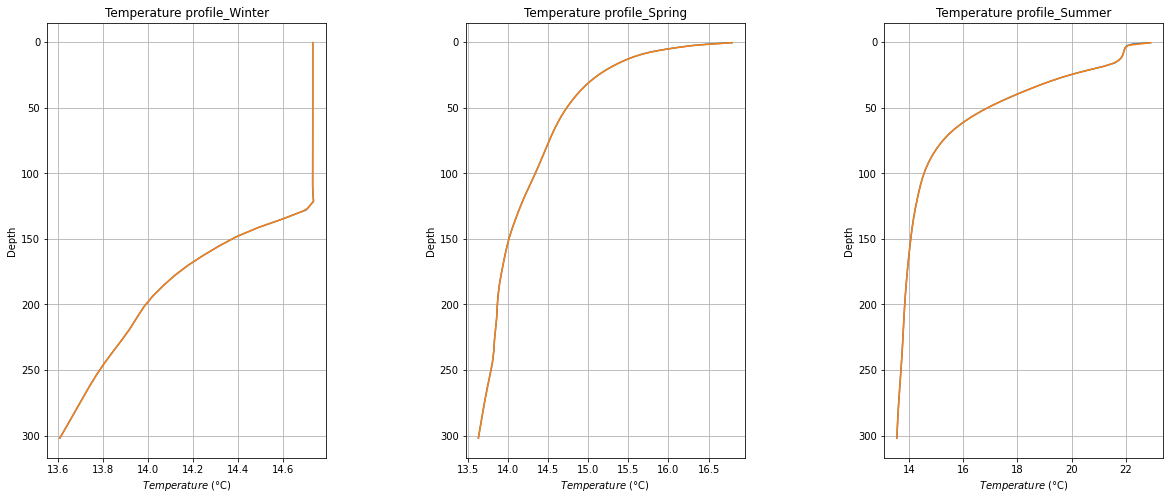

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)
fig.set_size_inches(20, 8)

T.sel(time_counter=winter_day).plot.line(y="deptht",ax=ax1)
T_win.plot.line(y="deptht",ax=ax1)
ax1.grid('on')
ax1.set_title("Temperature profile_Winter")
ax1.set_xlabel('$Temperature$ (°C)')
ax1.set_ylabel('Depth')
ax1.invert_yaxis()

T.sel(time_counter=spring_day).plot.line(y="deptht",ax=ax2)
T_spr.plot.line(y="deptht",ax=ax2)
ax2.grid('on')
ax2.set_title("Temperature profile_Spring")
ax2.set_xlabel('$Temperature$ (°C)')
ax2.set_ylabel('Depth')
ax2.invert_yaxis()

T.sel(time_counter=summer_day).plot.line(y="deptht",ax=ax3)
T_sum.plot.line(y="deptht",ax=ax3)
ax3.grid('on')
ax3.set_title("Temperature profile_Summer")
ax3.set_xlabel('$Temperature$ (°C)')
ax3.set_ylabel('Depth')
ax3.invert_yaxis()

#plt.savefig('Temperature_profile.jpg', bbox_inches='tight')
hide_toggle()

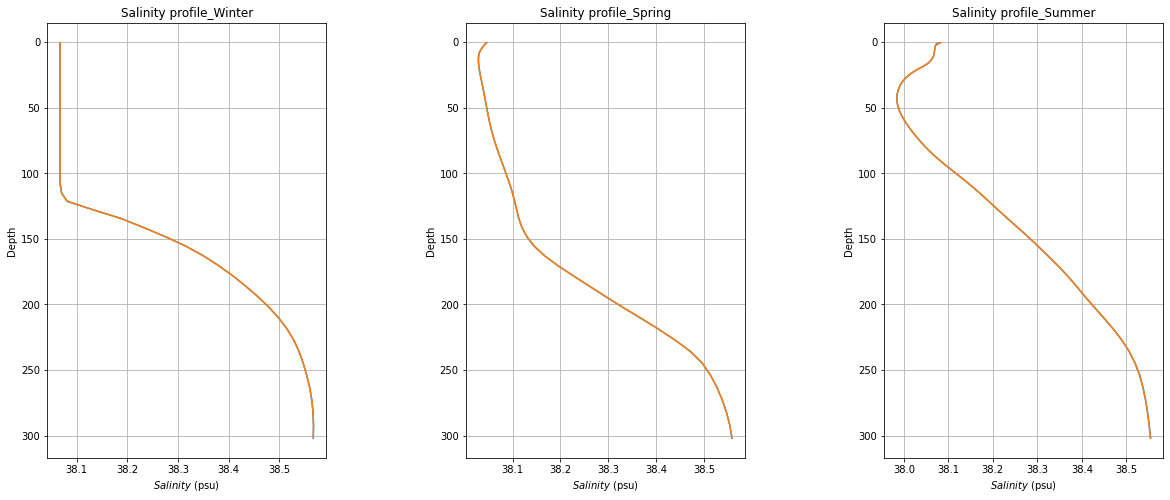

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)
fig.set_size_inches(20, 8)

S.sel(time_counter=winter_day).plot.line(y="deptht",ax=ax1)
S_win.plot.line(y="deptht",ax=ax1)
ax1.grid('on')
ax1.set_title("Salinity profile_Winter")
ax1.set_xlabel('$Salinity$ (psu)')
ax1.set_ylabel('Depth')
ax1.invert_yaxis()

S.sel(time_counter=spring_day).plot.line(y="deptht",ax=ax2)
S_spr.plot.line(y="deptht",ax=ax2)
ax2.grid('on')
ax2.set_title("Salinity profile_Spring")
ax2.set_xlabel('$Salinity$ (psu)')
ax2.set_ylabel('Depth')
ax2.invert_yaxis()

S.sel(time_counter=summer_day).plot.line(y="deptht",ax=ax3)
S_sum.plot.line(y="deptht",ax=ax3)
ax3.grid('on')
ax3.set_title("Salinity profile_Summer")
ax3.set_xlabel('$Salinity$ (psu)')
ax3.set_ylabel('Depth')
ax3.invert_yaxis()

#plt.savefig('Salinity_profile.jpg', bbox_inches='tight')

hide_toggle()

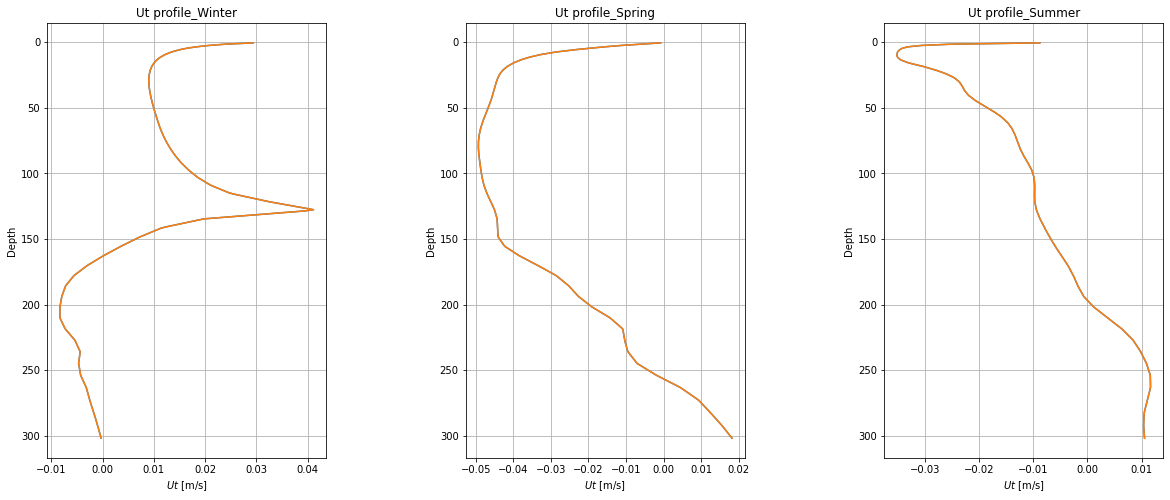

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)
fig.set_size_inches(20, 8)

Ut.sel(time_counter=winter_day).plot.line(y="depthu",ax=ax1)
Ut_win.plot.line(y="depthu",ax=ax1)
ax1.grid('on')
ax1.set_title("Ut profile_Winter")
ax1.set_xlabel('$Ut$ [m/s]')
ax1.set_ylabel('Depth')
ax1.invert_yaxis()

Ut.sel(time_counter=spring_day).plot.line(y="depthu",ax=ax2)
Ut_spr.plot.line(y="depthu",ax=ax2)
ax2.grid('on')
ax2.set_title("Ut profile_Spring")
ax2.set_xlabel('$Ut$ [m/s]')
ax2.set_ylabel('Depth')
ax2.invert_yaxis()

Ut.sel(time_counter=summer_day).plot.line(y="depthu",ax=ax3)
Ut_sum.plot.line(y="depthu",ax=ax3)
ax3.grid('on')
ax3.set_title("Ut profile_Summer")
ax3.set_xlabel('$Ut$ [m/s]')
ax3.set_ylabel('Depth')
ax3.invert_yaxis()

#plt.savefig('Ut_profile.jpg', bbox_inches='tight')

hide_toggle()

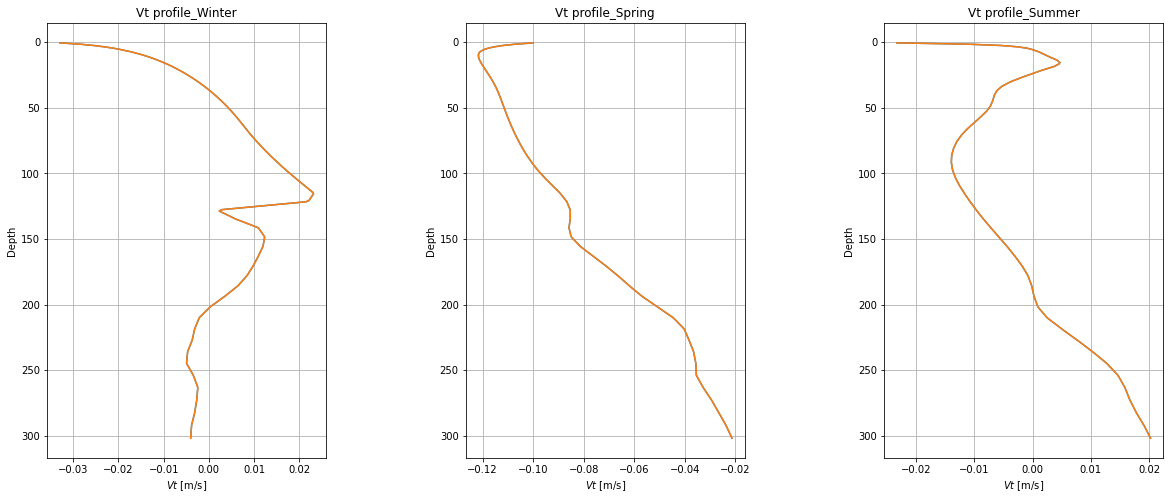

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)
fig.set_size_inches(20, 8)

Vt.sel(time_counter=winter_day).plot.line(y="depthv",ax=ax1)
Vt_win.plot.line(y="depthv",ax=ax1)
ax1.grid('on')
ax1.set_title("Vt profile_Winter")
ax1.set_xlabel('$Vt$ [m/s]')
ax1.set_ylabel('Depth')
ax1.invert_yaxis()

Vt.sel(time_counter=spring_day).plot.line(y="depthv",ax=ax2)
Vt_spr.plot.line(y="depthv",ax=ax2)
ax2.grid('on')
ax2.set_title("Vt profile_Spring")
ax2.set_xlabel('$Vt$ [m/s]')
ax2.set_ylabel('Depth')
ax2.invert_yaxis()

Vt.sel(time_counter=summer_day).plot.line(y="depthv",ax=ax3)
Vt_sum.plot.line(y="depthv",ax=ax3)
ax3.grid('on')
ax3.set_title("Vt profile_Summer")
ax3.set_xlabel('$Vt$ [m/s]')
ax3.set_ylabel('Depth')
ax3.invert_yaxis()

#plt.savefig('Vt_profile.jpg', bbox_inches='tight')

hide_toggle()

#### WINTER

In [18]:
# Data from each data frame. Selection of period for input data. I want to compare February, so I run January and February
U10_w = U10[0:472] # First 59 days of the dataset that corresponds to January and February, this dataset has a deltat=3 hours
V10_w = V10[0:472] # First 59 days of the dataset that corresponds to January and February, this dataset has a deltat=3 hours
new_time = np.linspace(3.471295e+09,3.476381e+09,101952) # this new time corresponds to our deltat= 50s
U10w = U10_w.interp(time_counter=new_time)
V10w = V10_w.interp(time_counter=new_time)
Windw_norm = np.sqrt((U10w**2)+(V10w**2))

#stress

tauxw = tau_x.sel(time_counter=slice('2010-01-01','2010-02-28'))
taux_w = tauxw.interp(time_counter=pd.date_range("2010-01-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=101952))
tauyw = tau_y.sel(time_counter=slice('2010-01-01','2010-02-28'))
tauy_w = tauyw.interp(time_counter=pd.date_range("2010-01-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=101952))


T_w = Td.sel(time_counter=slice('2010-01-01','2010-02-28'))
Tw = T_w.interp(time_counter=pd.date_range("2010-01-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=101952))
S_w = Sd.sel(time_counter=slice('2010-01-01','2010-02-28'))
Sw = S_w.interp(time_counter=pd.date_range("2010-01-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=101952))

Text(0.5, 0, 'time (days)')

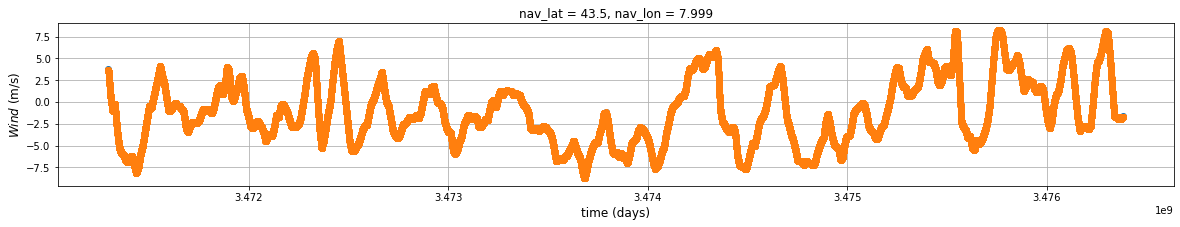

In [19]:
V10_w.plot(x="time_counter",marker="o")
V10w.plot(x="time_counter",marker="o")
plt.rcParams["figure.figsize"] = (20,3)
plt.grid('on')
plt.ylabel('$Wind$ (m/s)', fontsize=12)
plt.xlabel('time (days)', fontsize=12)

In [215]:
# Selection of period for velocities to conduct comparisons. Comparison is conducted in February

Utw = Ut.sel(depthu=slice(0,1.50)).sel(time_counter=slice('2010-02-01','2010-02-28')).interp(time_counter=pd.date_range("2010-02-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=48384))
Vtw = Vt.sel(depthv=slice(0,1.50)).sel(time_counter=slice('2010-02-01','2010-02-28')).interp(time_counter=pd.date_range("2010-02-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=48384)) #total velocity
Ugw = Ug.sel(time_counter=slice('2010-02-01','2010-02-28')).interp(time_counter=pd.date_range("2010-02-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=48384)) #geostrophic component
Vgw = Vg.sel(time_counter=slice('2010-02-01','2010-02-28')).interp(time_counter=pd.date_range("2010-02-01T00:30:00.000000000", "2010-02-28T23:30:00.000000000", periods=48384)) #geostrophic component

Uagw = Utw - Ugw #ageostrophic component
Vagw = Vtw - Vgw #ageostrophic component

In [294]:
# Wind for comparison plots- FEBRUARY
U10_wp = U10[248:472]
V10_wp = V10[248:472]
new_time_p = np.linspace(3.473973e+09,3.476381e+09,48384)
U10wp = U10_wp.interp(time_counter=new_time_p)
V10wp = V10_wp.interp(time_counter=new_time_p)
W10wp = np.sqrt((U10wp**2)+(V10wp**2))

In [342]:
U10_s

<xarray.DataArray 'u10' (time_counter: 488)>
array([4.013253, 2.973589, 1.715434, ..., 2.594727, 1.557941, 0.786963],
      dtype=float32)
Coordinates:
    nav_lat       float64 43.5
    nav_lon       float64 7.999
  * time_counter  (time_counter) float64 3.484e+09 3.484e+09 ... 3.49e+09
Attributes:
    long_name:     Zonal wind speed at 10m
    units:         m/s
    valid_range:   [-28.667095  23.686893]
    actual_range:  [-22.70351   18.681898]

#### SUMMER

In [336]:
# Data from each data frame. Selection of period Selection of period for input data. I want to compare July, so I run June and July
U10_s = U10[len(U10)-488:len(U10)] #Last 488 days that corresponds to June and July, this dataset has a deltat=3 hours
V10_s = V10[len(U10)-488:len(U10)] #Last 488 days that corresponds to June and July, this dataset has a deltat=3 hours
new_time_s = np.linspace(3.484341e+09,3.489601e+09,105408) # this new time corresponds to our deltat= 50s
U10s = U10_s.interp(time_counter=new_time_s)
V10s = V10_s.interp(time_counter=new_time_s)
Winds_norm = np.sqrt((U10s**2)+(V10s**2))

#stress

tauxs = tau_x.sel(time_counter=slice('2010-06-01','2010-07-31'))
taux_s = tauxs.interp(time_counter=pd.date_range("2010-06-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=105408))
tauys = tau_y.sel(time_counter=slice('2010-06-01','2010-07-31'))
tauy_s = tauys.interp(time_counter=pd.date_range("2010-06-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=105408))

#Tracers
T_s = Td.sel(time_counter=slice('2010-06-01','2010-07-31'))
Ts = T_s.interp(time_counter=pd.date_range("2010-06-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=105408))
S_s = Sd.sel(time_counter=slice('2010-06-01','2010-07-31'))
Ss = S_s.interp(time_counter=pd.date_range("2010-06-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=105408))

Text(0.5, 0, 'time (days)')

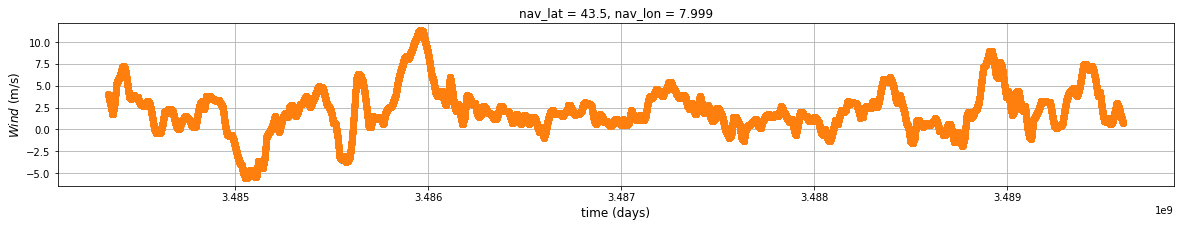

In [22]:
U10_s.plot(x="time_counter",marker="o")
U10s.plot(x="time_counter",marker="o")
plt.rcParams["figure.figsize"] = (20,3)
plt.grid('on')
plt.ylabel('$Wind$ (m/s)', fontsize=12)
plt.xlabel('time (days)', fontsize=12)

In [288]:
# Selection of period for velocities to conduct comparisons
Uts = Ut.sel(time_counter=slice('2010-07-01','2010-07-31')).interp(time_counter=pd.date_range("2010-07-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=53568)) #total velocity
Vts = Vt.sel(time_counter=slice('2010-07-01','2010-07-31')).interp(time_counter=pd.date_range("2010-07-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=53568)) #total velocity
Ugs = Ug.sel(time_counter=slice('2010-07-01','2010-07-31')).interp(time_counter=pd.date_range("2010-07-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=53568)) #geostrophic component
Vgs = Vg.sel(time_counter=slice('2010-07-01','2010-07-31')).interp(time_counter=pd.date_range("2010-07-01T00:30:00.000000000", "2010-07-31T23:30:00.000000000", periods=53568)) #geostrophic component

Uags = Uts - Ugs #ageostrophic component
Vags = Vts - Vgs #ageostrophic component

In [372]:
U10_sp

<xarray.DataArray 'u10' (time_counter: 248)>
array([0.612489, 0.414299, 0.627775, ..., 2.594727, 1.557941, 0.786963],
      dtype=float32)
Coordinates:
    nav_lat       float64 43.5
    nav_lon       float64 7.999
  * time_counter  (time_counter) float64 3.487e+09 3.487e+09 ... 3.49e+09
Attributes:
    long_name:     Zonal wind speed at 10m
    units:         m/s
    valid_range:   [-28.667095  23.686893]
    actual_range:  [-22.70351   18.681898]

In [373]:
# Wind for comparison plots- JULY
U10_sp = U10[len(U10)-248:len(U10)]
V10_sp = V10[len(U10)-248:len(U10)]
new_time_sp = np.linspace(3.486933e+09,3.489601e+09,53568)
U10sp = U10_sp.interp(time_counter=new_time_sp)
V10sp = V10_sp.interp(time_counter=new_time_sp)
W10sp = np.sqrt((U10sp**2)+(V10sp**2))

In [374]:
W10sp.shape

(53568,)

## 3. 1D Model functions- 2 Layers

In [82]:
def slab2lr4(lon,lat,time, Bc_u, Bc_v, K, alpha):


    nx=len(lon)
    ny=len(lat)
    nt=len(time)
    dtime = time[1] - time[0]


    U0 = np.empty((nt, ny, nx))
    V0 = np.empty((nt, ny, nx))
    U1 = np.empty((nt, ny, nx))
    V1 = np.empty((nt, ny, nx))

    U0[0,:,:]=0.
    V0[0,:,:]=0.
    U1[0,:,:]=0.
    V1[0,:,:]=0.

    lat2, lon2 = np.meshgrid(lat,lon, indexing='ij')
    fc = 2*2*np.pi/86164*np.sin(lat2*np.pi/180)

    for it in range(nt-1):
        U0t =  fc * V0[it,:,:] + (  Bc_u[it] - np.exp(K[1]) * (U0[it,:,:] -U1[it,:,:])  )*alpha
        V0t = -fc * U0[it,:,:] + (  Bc_v[it] - np.exp(K[1]) * (V0[it,:,:] -V1[it,:,:])  )*alpha
        U1t =  fc * V1[it,:,:] + (  np.exp(K[2]) * (U0[it,:,:]-U1[it,:,:]) - np.exp(K[3]) * U1[it,:,:]  )*alpha
        V1t = -fc * U1[it,:,:] + (  np.exp(K[2]) * (V0[it,:,:]-V1[it,:,:]) - np.exp(K[3]) * V1[it,:,:]  )*alpha 
    
        U0[it+1, :, :] = U0[it, :, :] + dtime*86400*U0t
        V0[it+1, :, :] = V0[it, :, :] + dtime*86400*V0t
        U1[it+1, :, :] = U1[it, :, :] + dtime*86400*U1t
        V1[it+1, :, :] = V1[it, :, :] + dtime*86400*V1t  

    return U0, V0, U1, V1

hide_toggle()

#### 3.2 Plots functions

In [113]:
def plot_1D_velocities(cols,rows,U,V,gtime,time,heights):
    
    """This function allows to get the plots of velocity components along the time for each layer of the model 
    • cols: number of cols desired in the plot
    • rows: number of rows desired in the plot
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation
    • time: Desired visualiwation time
    • heights: vector that contains the heigth or level at which the velocities were computed"""

    fig, ax = plt.subplots(rows, cols)
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.6, hspace = 1.6)
    fig.set_size_inches(40, 40)
    
    if cols == 1:
        axm = ax[:,None]
    else: 
        axm = ax
    
    for row in range(rows):

        for col in range(cols):
            im3 = axm[row, col].plot(gtime[0:time], U[(row+col+(row*(cols-1))),0:time], lw=1.5, label='U')
            im3 = axm[row, col].plot(gtime[0:time], V[(row+col+(row*(cols-1))),0:time], lw=1.5, label='V')
            axm[row, col].grid('on')
            axm[row, col].set_ylabel('U,V (m/s)', fontsize=12)
            axm[row, col].set_xlabel('time (days)', fontsize=12)
            axm[row, col].tick_params(axis='y')
            axm[row, col].tick_params(labelsize=10)
            axm[row, col].legend(fontsize=8)
            axm[row, col].set_title("Height: {} m ".format(heights[(row+col+(row*(cols-1)))]))
            
            
def plot_1D_velocities_hours(cols,rows,U,V,gtime,time_i,time_f,heights):
    
    """This function allows to get the plots of velocity components along the time for each layer of the model 
    defining the initial and final time
    • cols: number of cols desired in the plot
    • rows: number of rows desired in the plot
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation in hours
    • time_i: Desired initial visualization time
    • time_f: Desired final visualization time
    • heights: vector that contains the heigth or level at which the velocities were computed"""

    fig, ax = plt.subplots(rows, cols, figsize=(10,10))
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.2, hspace = 2)
    fig.set_size_inches(40, 40)
    
    if cols == 1:
        axm = ax[:,None]
    else: 
        axm = ax
    
    for row in range(rows):

        for col in range(cols):
            im3 = axm[row, col].plot(gtime[time_i:time_f], U[(row+col+(row*(cols-1))),time_i:time_f], lw=1.5, label='U')
            im3 = axm[row, col].plot(gtime[time_i:time_f], V[(row+col+(row*(cols-1))),time_i:time_f], lw=1.5, label='V')
            axm[row, col].grid('on')
            axm[row, col].set_ylabel('U,V (m/s)', fontsize=12)
            axm[row, col].set_xlabel('time (hours)', fontsize=12)
            axm[row, col].tick_params(axis='y')
            axm[row, col].tick_params(labelsize=10) 
            #axm[row, col].set_xticks(np.arange(0, gtime[-1], 0.0008))
            axm[row, col].legend(fontsize=8)
            axm[row, col].set_title("Height: {} m ".format(heights[(row+col+(row*(cols-1)))]))
            
def plot_1D_velocities_layer(U,V,gtime,time_i,time_f,heights,layers_vector):
    
    """This function allows to get the plots of velocity components along the time for each layer of the model 
    • cols: number of cols desired in the plot
    • rows: number of rows desired in the plot
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation in hours
    • time_i: Desired initial visualization time
    • time_f: Desired final visualization time
    • heights: vector that contains the heigth or level at which the velocities were computed
    • layers_vector: The vector that contains the desired layers to plot"""
    
    fig, ax = plt.subplots(len(layers_vector),1,figsize=(3,5))
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.7, hspace = 0.3)
    fig.set_size_inches(20,20)
    
    for j,l in enumerate(layers_vector): 

        im1 = ax[j].plot(gtime[time_i:time_f], U[l,time_i:time_f], lw=1.5, label='U')
        im1 = ax[j].plot(gtime[time_i:time_f], V[l,time_i:time_f], lw=1.5, label='V')
        #ax[j].set_ylim([np.min(U[0,:]), np.max(U[0,:])])
        ax[j].grid('on')
        ax[j].set_ylabel('U,V (m/s)', fontsize=20)
        ax[j].set_xlabel('time (days)', fontsize=20)
        ax[j].tick_params(axis='y')
        ax[j].tick_params(labelsize=20) 
        ax[j].legend(fontsize=18)
        ax[j].set_title("Height: {} m ".format(heights[l]), fontsize=20)

print('Functions to plot oscillations of U and V along time general, detail by hours and only for 4 levels ')
hide_toggle()

Functions to plot oscillations of U and V along time general, detail by hours and only for 4 levels 


In [111]:
def plot_1D_profile(U,V,K,time,heights,t1,kappa_profile):  
    
    """ This function allows to plot the vertical profile of U and V velocities
    • U,V: arrays of velocities along the depth and time, rows are velocites at each depth, coulumns is the variation of U along         time
    • gtime: vector of time of the simulation
    • heights: Vector that constains the heights at which were found the velocities
    • t1: times at which is desired to get the plot
    • kappa_profile: indicate 'yes' if it is desire to include the eddy viscosity profile"""
    
    rows = 1
    if kappa_profile== 'yes':
        cols = 3
    else: 
        cols = 2
    
    
    fig, ax = plt.subplots(rows, cols, figsize=(10,10))
    fig.subplots_adjust(left = 2, bottom = 9, right = 3, top = 10, wspace = 0.5, hspace = 0.4)
    fig.set_size_inches(20, 20)
    
    print(ax[None,:].shape)
    
    if rows == 1:
        axm = ax[None,:]
    else: 
        axm = ax

    im1 = axm[0, 0].plot(U[:,t1],heights,'bo-', lw=2, label = "time: {} days, ".format(int(time[t1]-time[0])))
    axm[0, 0].grid('on')
    axm[0, 0].set_ylabel('Depth (m)', fontsize=18)
    axm[0, 0].set_xlabel('U (m/s)', fontsize=18)
    axm[0, 0].tick_params(axis='y')
    axm[0, 0].tick_params(labelsize=15)
    axm[0, 0].legend(fontsize=14)
    axm[0, 0].set_title(" U profile ", fontsize=20)
    axm[0, 0].invert_yaxis()

    
    im2 = axm[0, 1].plot(V[:,t1],heights, 'bo-', lw=2,  label = "time: {} days, ".format(int(time[t1]-time[0])))
    axm[0, 1].grid('on')
    axm[0, 1].set_ylabel('Height (m)', fontsize=18)
    axm[0, 1].set_xlabel('V (m/s)', fontsize=18)
    axm[0, 1].tick_params(axis='y')
    axm[0, 1].tick_params(labelsize=15)
    axm[0, 1].legend(fontsize=14)
    axm[0, 1].set_title(" V profile ", fontsize=20)
    axm[0, 1].invert_yaxis()
    
    if kappa_profile=='yes':       
        im3 = axm[0, 2].plot(K[:,t1],heights, 'bo-', lw=2,  label = "time: {} days, ".format(int(time[t1]-time[0])))
        axm[0, 2].grid('on')
        axm[0, 2].set_ylabel('Height (m)', fontsize=18)
        axm[0, 2].set_xlabel('Eddy viscosity $\kappa (m^2/s)$', fontsize=18)
        axm[0, 2].tick_params(axis='y')
        axm[0, 2].tick_params(labelsize=15)
        axm[0, 2].legend(fontsize=14)
        axm[0, 2].set_title(" $\kappa(z)$ profile ", fontsize=20)
        axm[0, 2].invert_yaxis()

print('Function to plot U and V profiles for 1 time')
hide_toggle()

Function to plot U and V profiles for 1 time


In [115]:
def plot_complex(cols,rows,U,V,gtime,ti,tf,heights):

    """This function allows to get the plots of the relation abs(U+iV) to compute the mean time
    • cols: number of cols desired in the plot
    • rows: number of rows desired in the plot
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation
    • ti,tf: Desired visualization time
    • layers_vector: The vector that contains the desired layers to plot"""

    fig, ax = plt.subplots(rows, cols, figsize=(10,10))
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.2, hspace = 0.6)
    fig.set_size_inches(20, 20)
                       
    if cols == 1:
        axm = ax[:,None]
    else: 
        axm = ax
    
    for row in range(rows):

        for col in range(cols):
            im1 = axm[row, col].plot(gtime[ti:tf], np.abs(U[(row+col+(row*(cols-1))),ti:tf]+(1j*V[(row+col+(row*(cols-1))),0:time])), lw=1.5, label='U+iV')
            axm[row, col].grid('on')
            axm[row, col].set_ylabel('U+iV (m/s)', fontsize=20)
            axm[row, col].set_xlabel('time (days)', fontsize=20)
            axm[row, col].tick_params(axis='y')
            axm[row, col].tick_params(labelsize=18)
            axm[row, col].legend(fontsize=14)
            axm[row, col].set_title("Height: {} m ".format(heights[(row+col+(row*(cols-1)))]))
            


def plot_complex_layer(U,V,gtime,ti,tf,heights,layers_vector):

    """This function allows to get the plots of the relation abs(U+iV) to compute the mean time for the 
    desire layers
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation
    • ti,tf: Desired visualization time
    • heights: vector that contains the heigth or level at which the velocities were computed
    • layer1,layer2,layer3,layer4: desire layers to plot"""
    
    fig, ax = plt.subplots(len(layers_vector),1,figsize=(3,5))
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.7, hspace = 0.3)
    fig.set_size_inches(20,20)                  
    
    for j,l in enumerate(layers_vector):
    
        im1 = ax[j].plot(gtime[ti:tf], np.abs(U[l,ti:tf]+(1j*V[l,ti:tf])), lw=1.5, label='|U+iV|')
        ax[j].grid('on')
        ax[j].set_ylabel('|U+iV|', fontsize=20)
        ax[j].set_xlabel('time (days)', fontsize=20)
        ax[j].tick_params(axis='y')
        ax[j].tick_params(labelsize=18)
        ax[j].legend(fontsize=14)
        ax[j].set_title("Height: {} m ".format(heights[l]), fontsize=21)
            
print('Function to plot |U+iV| (magnitude) for each layer and specific given layers')

hide_toggle()

Function to plot |U+iV| (magnitude) for each layer and specific given layers


## 4. Experiments

### 4.1 Winter- January 2010

In [296]:
#grid

dlon1=0.25 #Delta x
dlat1=0.25 #Delta y
dtime1=50/86400 #Delta t
z1 = np.array((0.48,1.48)) # Levels

box1= [8, 9, 43.5, 44.5, 0, 59]

glon1 = np.arange(box1[0], box1[1]+dlon1, dlon1)
glat1 = np.arange(box1[2], box1[3]+dlat1, dlat1)
gtime1 = np.arange(box1[4], box1[5], dtime1)

nx=len(glon1)
ny=len(glat1)
nt=len(gtime1)

In [59]:
# Definition of surface boundary condition

# Computation of wind stress and surface boundary condition

rho_air = 1.225
rho_water = 1027
Cd1 = 7.94e-5*Windw_norm + 6.12e-4

Shear_x1 = rho_air * Cd1 * Windw_norm * U10w
Shear_y1 = rho_air * Cd1 * Windw_norm * V10w

BC_u1 = Shear_x1.values / rho_water
BC_v1 = Shear_y1.values / rho_water

#BC_u1 = taux_w.values  / rho_water
#BC_v1 = tauy_w.values  / rho_water

print(BC_v1.shape)

(101952,)


In [104]:
# Definition of eddy viscosity (kappa)
K1 = [-12.77387945, -7.63622776, -9.7, -12.74521811]
print(np.exp(K1))

[2.83383554e-06 4.82645678e-04 6.12834951e-05 2.91623222e-06]


In [305]:
# Computation of velocities                            
U0,V0,U1,V1 = slab2lr4(glon1,glat1,gtime1, BC_u1, BC_v1, K1, 1)

In [306]:
Ur1 = np.zeros((2,101952))
Ur1[0,:] = U0[:,0,0]
Ur1[1,:] = U1[:,0,0]

Vr1 = np.zeros((2,101952))
Vr1[0,:] = V0[:,0,0]
Vr1[1,:] = V1[:,0,0]

Ur1.shape

(2, 101952)

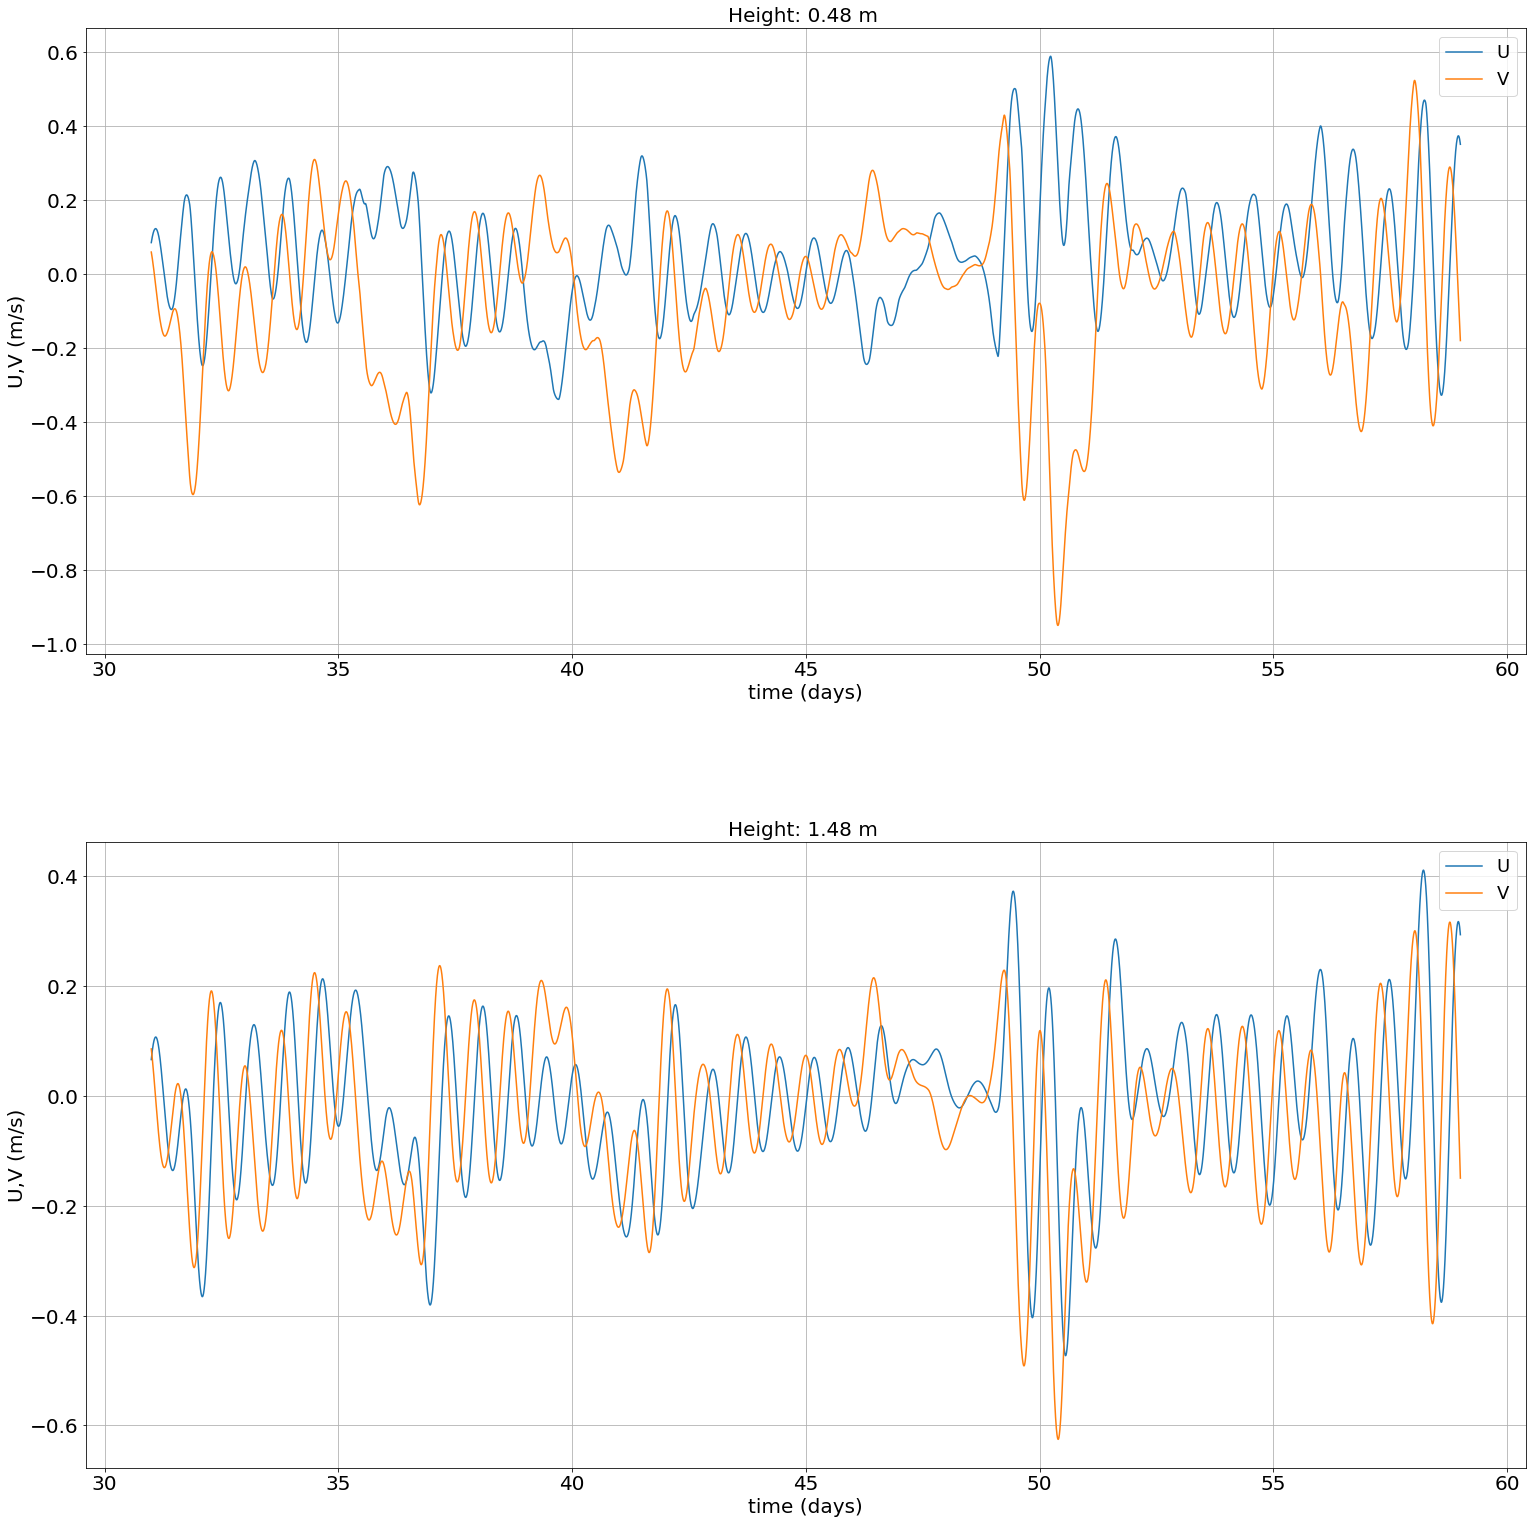

In [314]:
layers_p = np.array([0,1])
plot_1D_velocities_layer(Ur1,Vr1,gtime1,53568,101951,z1,layers_p)

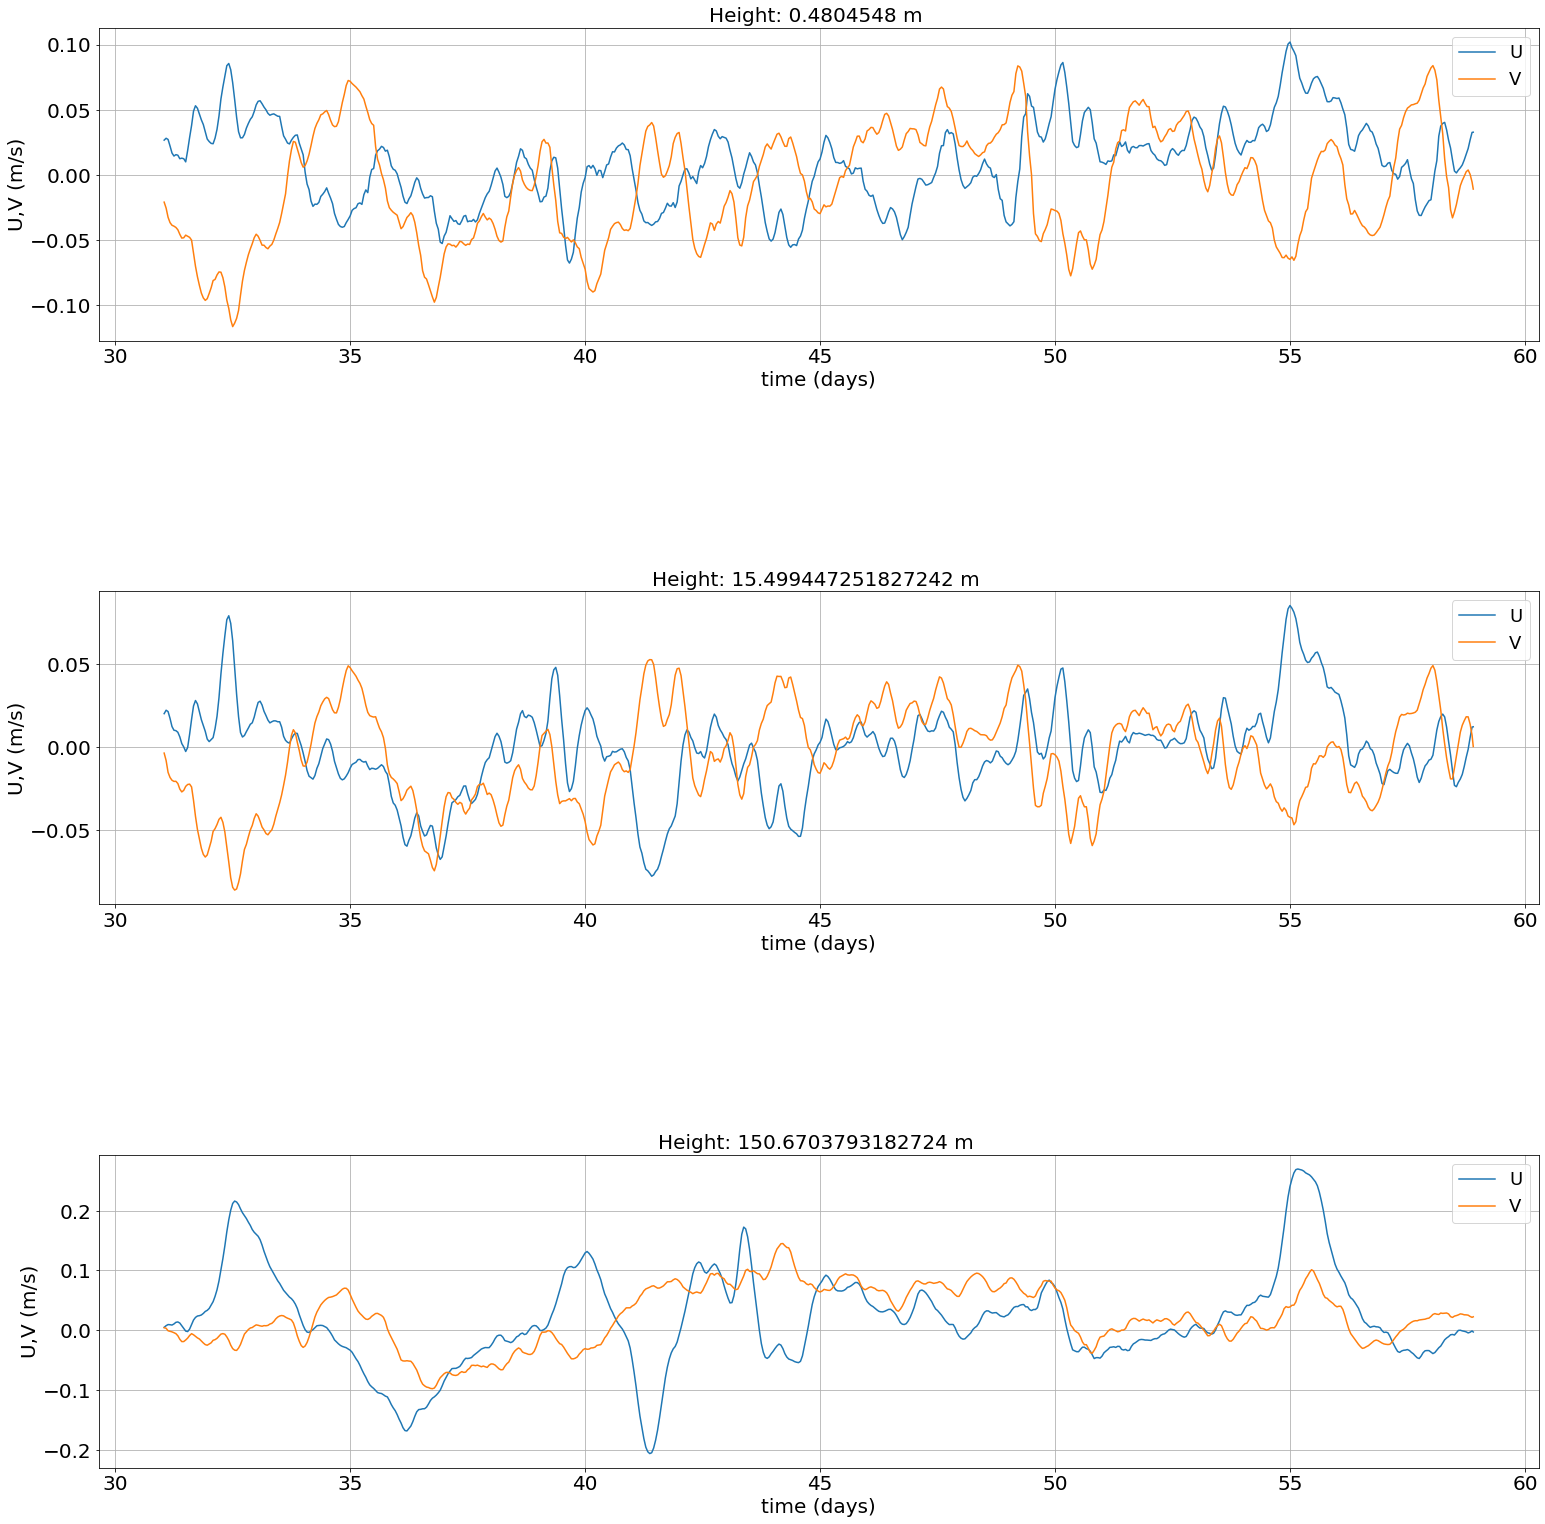

In [88]:
plot_1D_velocities_layer(Uagw[0:670],Vagw[0:670],tr1_c,0,670,z1n,layers_p)

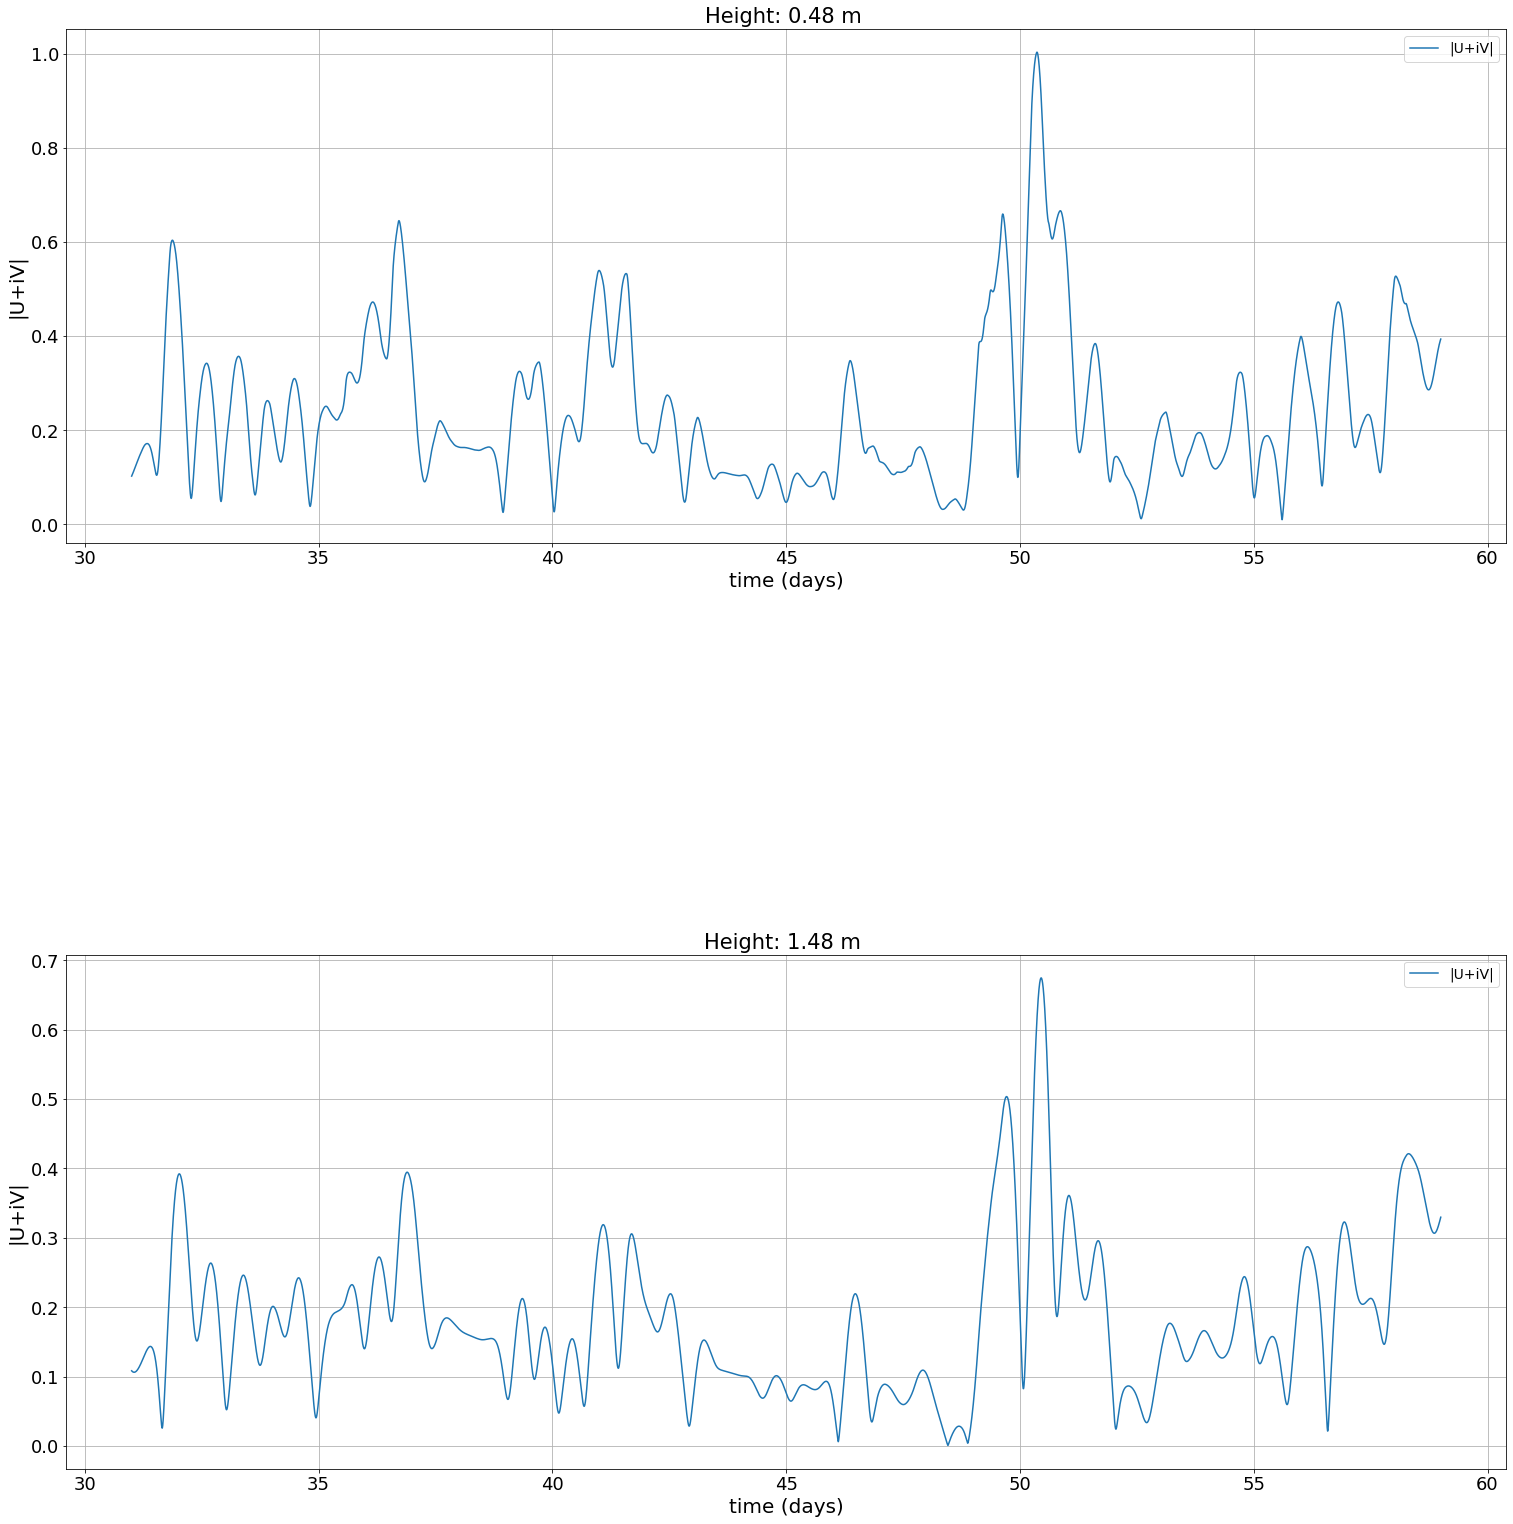

In [317]:
plot_complex_layer(Ur1,Vr1,gtime1,53568,101951,z2,layers_p)

### 4.2 Summer- July 2010

In [331]:
#grid

dlon2=0.25 #Delta x
dlat2=0.25 #Delta y
dtime2=50/86400 #Delta t
z2 = np.array((0.48,1.48)) # Levels

box2= [8, 9, 43.5, 44.5, 0, 61]

glon2 = np.arange(box2[0], box2[1]+dlon2, dlon2)
glat2 = np.arange(box2[2], box2[3]+dlat2, dlat2)
gtime2 = np.arange(box2[4], box2[5], dtime2)
gtime2.shape

(105408,)

In [335]:
# Definition of surface boundary condition

# Computation of wind stress and surface boundary condition

rho_air = 1.225
rho_water = 1027
Cd2 = 7.94e-5*Winds_norm + 6.12e-4

Shear_x2 = rho_air * Cd2 * Winds_norm * U10s
Shear_y2 = rho_air * Cd2 * Winds_norm * V10s

BC_u2 = Shear_x2.values / rho_water
BC_v2 = Shear_y2.values / rho_water

#BC_u2 = taux_s.values.values / rho_water
#BC_v2 = taux_s.values.values / rho_water
U10s

<xarray.DataArray 'u10' (time_counter: 105408)>
array([4.01325274, 4.00844893, 4.00364512, ...,        nan,        nan,
              nan])
Coordinates:
    nav_lat       float64 43.5
    nav_lon       float64 7.999
  * time_counter  (time_counter) float64 3.484e+09 3.484e+09 ... 3.49e+09
Attributes:
    long_name:     Zonal wind speed at 10m
    units:         m/s
    valid_range:   [-28.667095  23.686893]
    actual_range:  [-22.70351   18.681898]

In [333]:
# Definition of eddy viscosity (kappa)
K2 = [-12.77387945, -7.63622776, -9.7, -12.74521811]

In [329]:
# Computation of velocities                            
U02,V02,U12,V12 = slab2lr4(glon2,glat2,gtime2, BC_u2, BC_v2, K2, 1)

In [330]:
U02[:,-1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00186628,  0.00186628,  0.00186628,  0.00186628,  0.00186628],
       [ 0.00367106,  0.00367106,  0.00367106,  0.00367106,  0.00367106],
       ...,
       [-0.06498239, -0.06498239, -0.06498239, -0.06498239, -0.06498239],
       [-0.06526841, -0.06526841, -0.06526841, -0.06526841, -0.06526841],
       [-0.06554805, -0.06554805, -0.06554805, -0.06554805, -0.06554805]])

In [321]:
Ur2 = np.zeros((2,105408))
Ur2[0,:] = U02[:,0,0]
Ur2[1,:] = U12[:,0,0]

Vr2 = np.zeros((2,105408))
Vr2[0,:] = V02[:,0,0]
Vr2[1,:] = V12[:,0,0]

Ur2

array([[0.00000000e+00, 1.86628055e-03, 3.67129362e-03, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 5.71860974e-06, ...,
                   nan,            nan,            nan]])

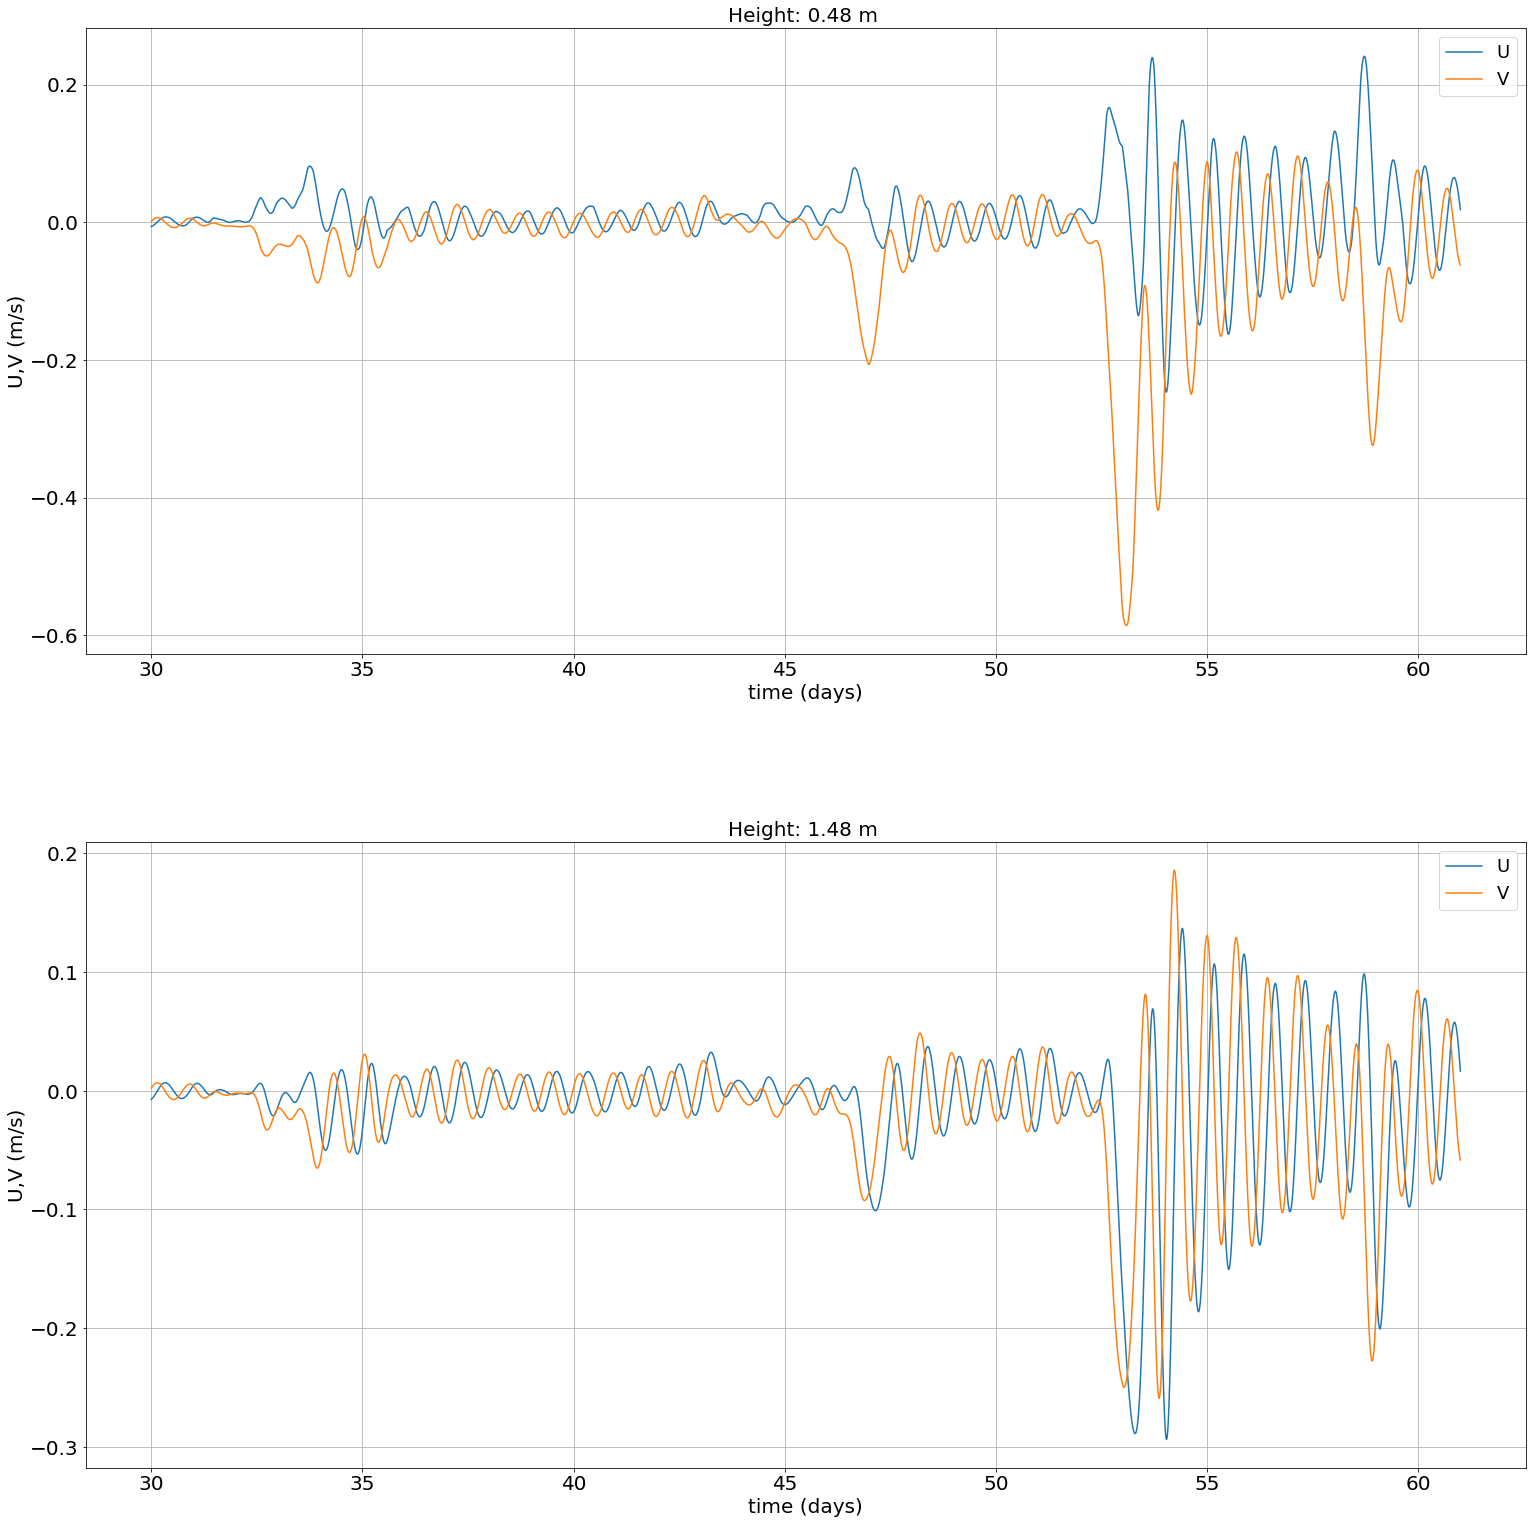

In [315]:
layers_p = np.array([0,1])
plot_1D_velocities_layer(Ur2,Vr2,gtime2,51840,105407,z2,layers_p)

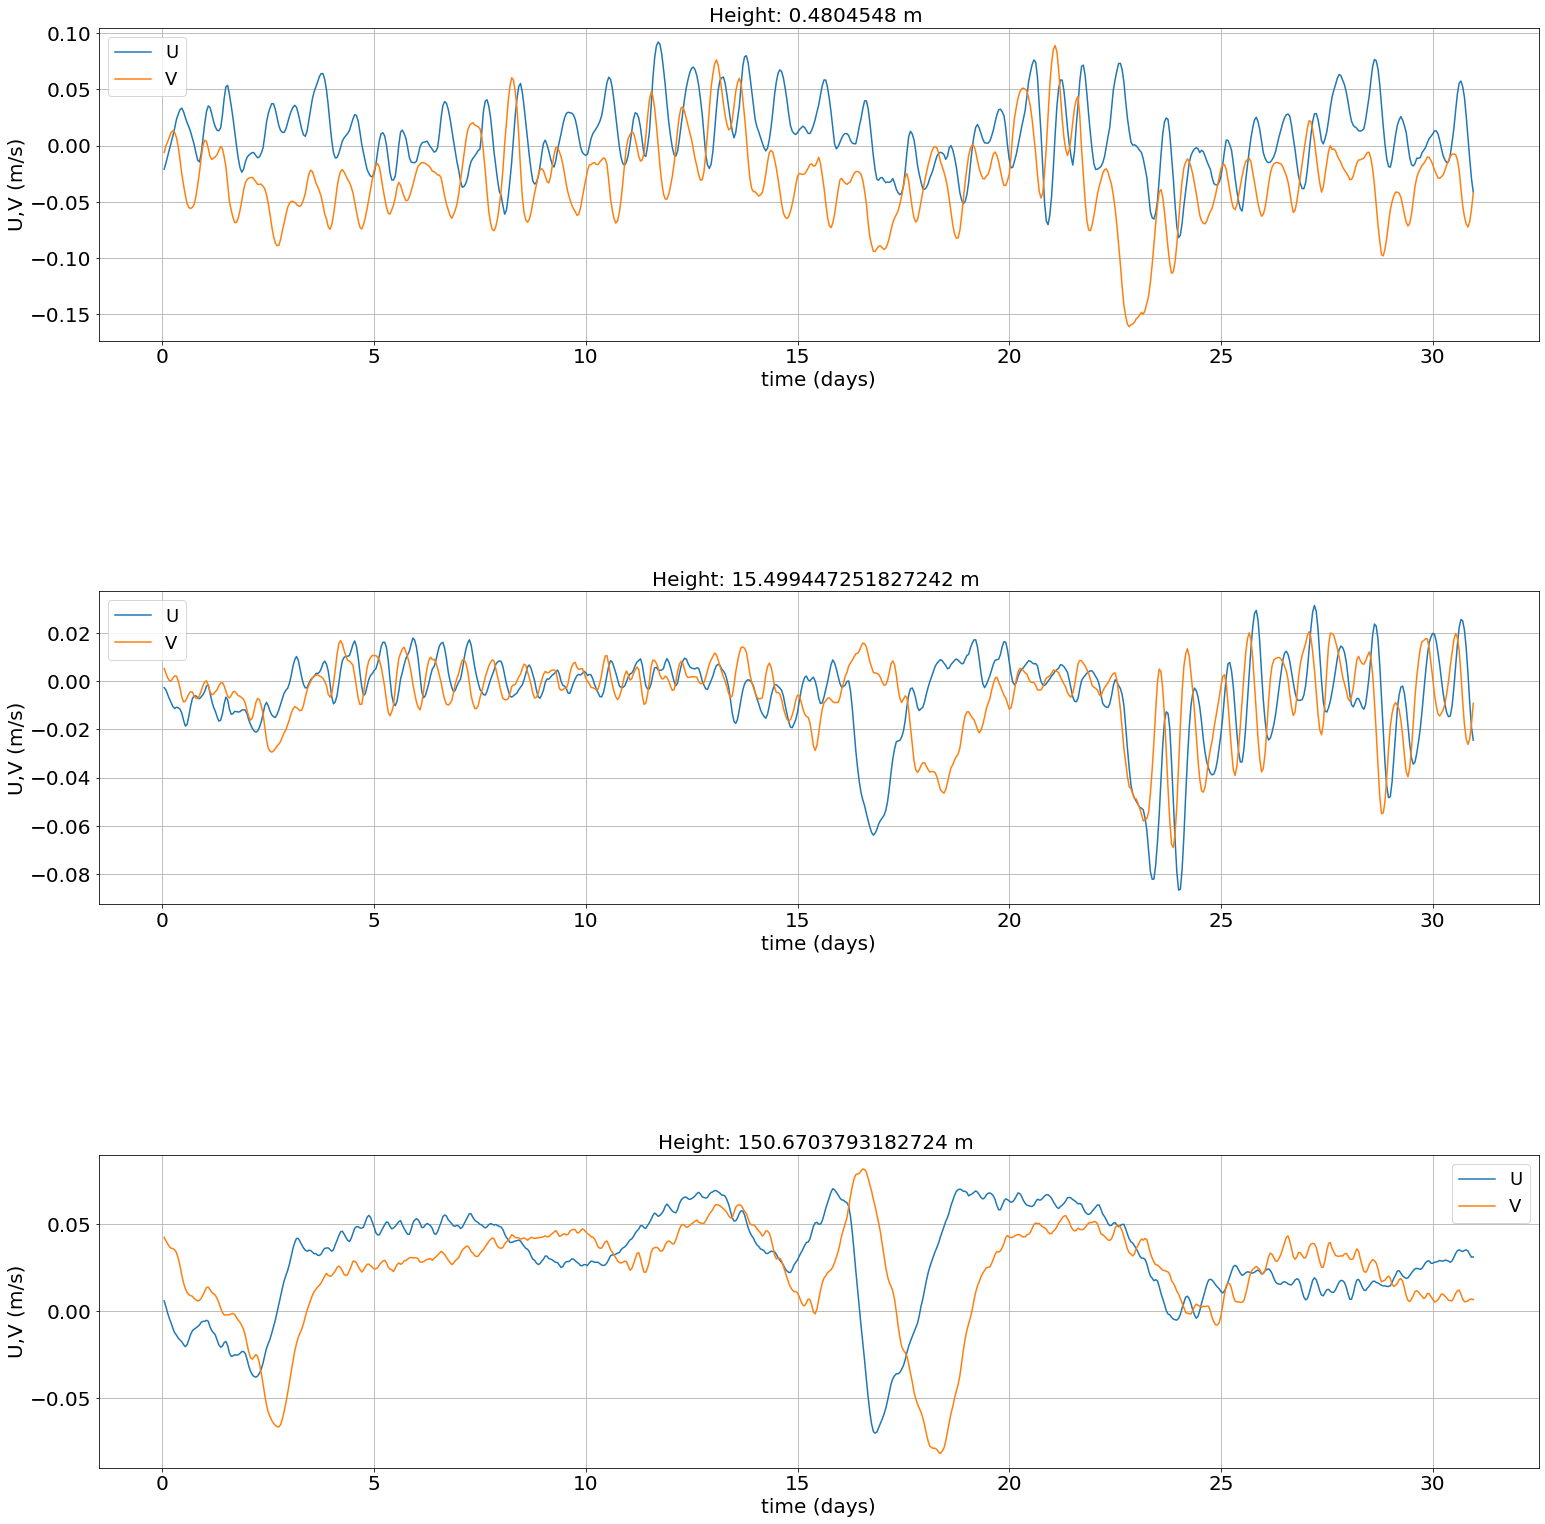

In [130]:
plot_1D_velocities_layer(Uags[0:670],Vags[0:670],tr1,0,743,z2n,layers_p)

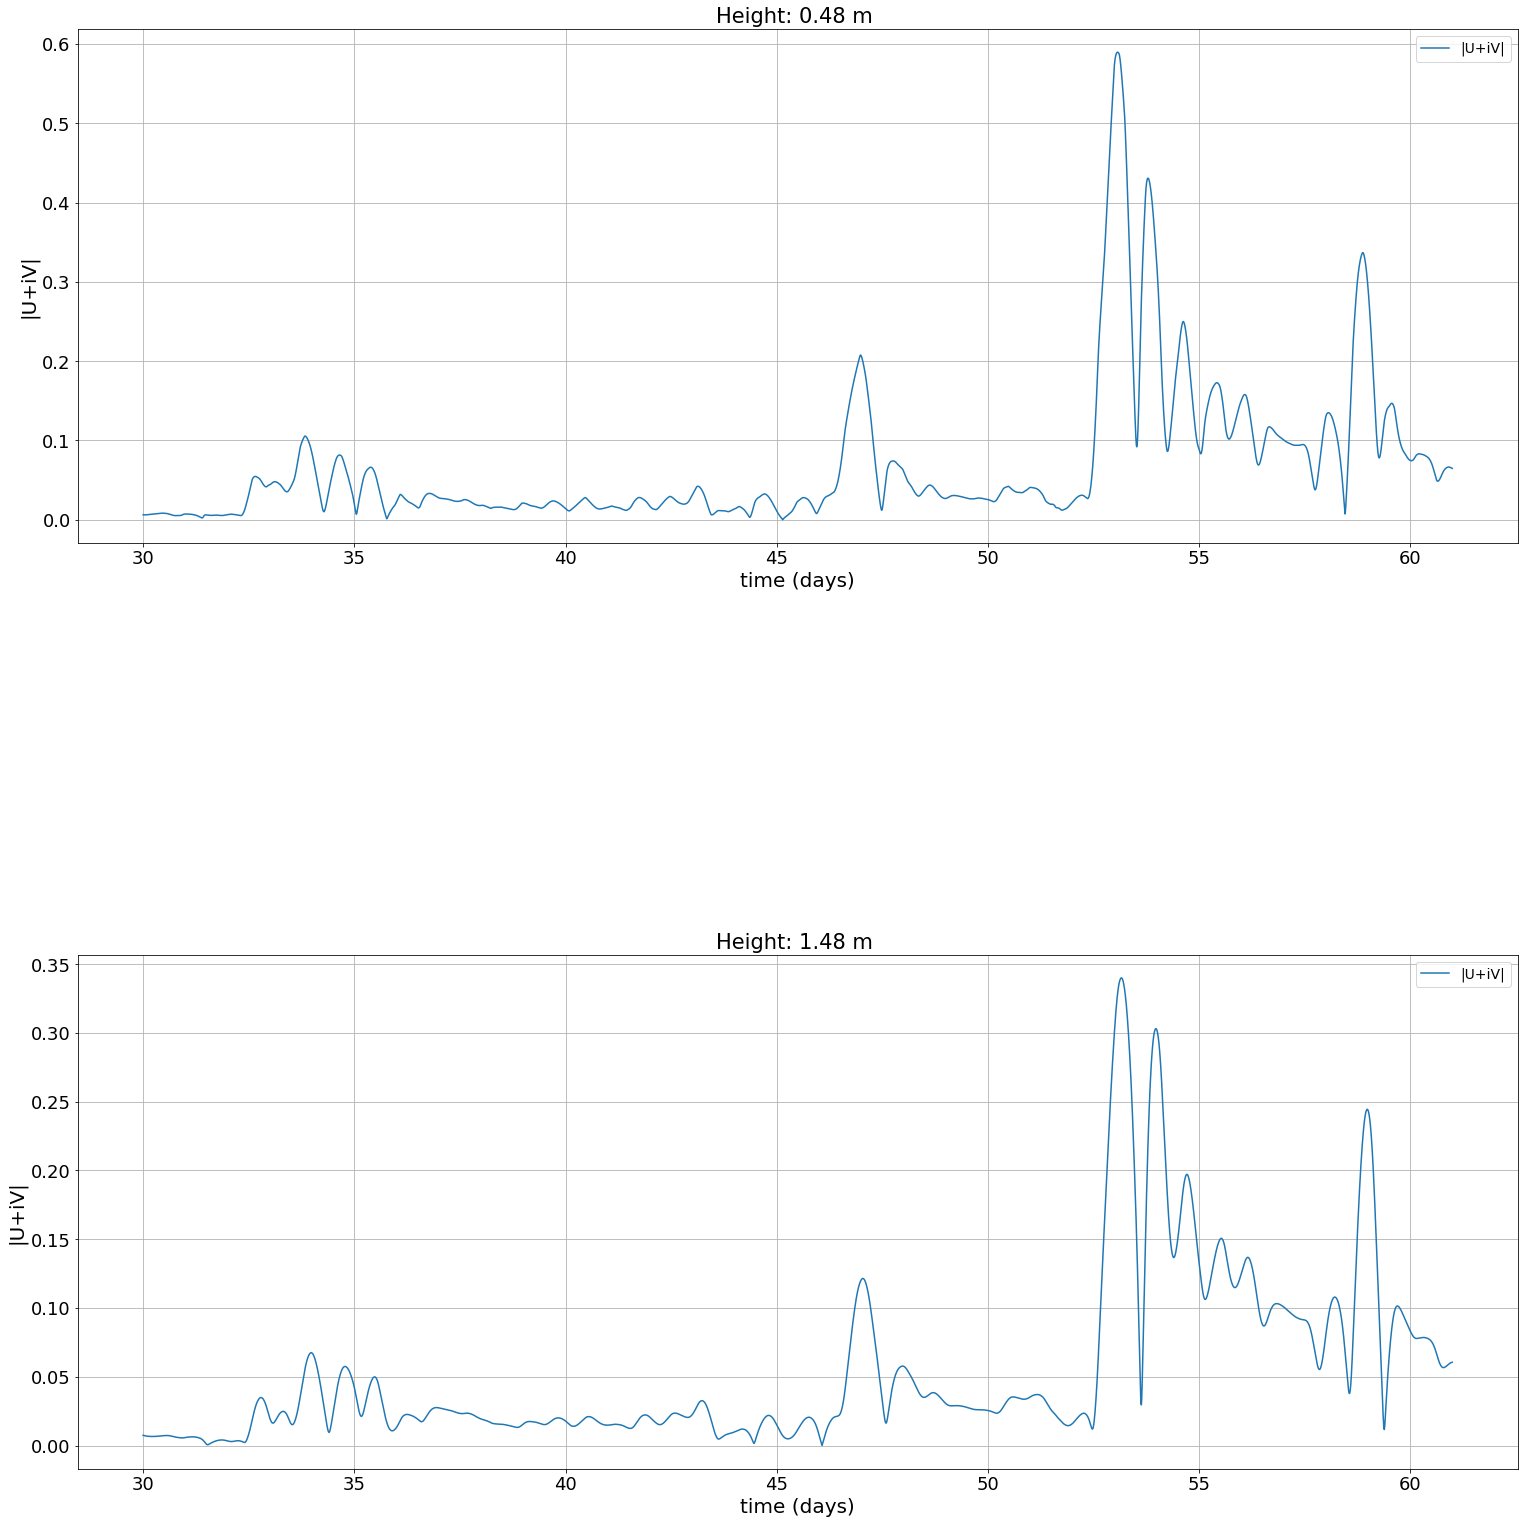

In [318]:
plot_complex_layer(Ur2,Vr2,gtime2,51840,105407,z2,layers_p)

## 5 Frequencies

In [243]:
import sys,os,shutil
import pdb
import scipy 
from math import pi
from scipy.fftpack import fft

def psd1d(hh=None,dx=1.,tap=0.05, detrend=True):

    hh=hh-np.mean(hh)
    nx=np.shape(hh)[0]

    if detrend:
        hh=scipy.signal.detrend(hh)

    if tap>0:
        ntaper = np.int(tap * nx + 0.5)
        taper = np.zeros(nx)+1.
    
        taper[:ntaper] = np.cos(np.arange(ntaper)/(ntaper-1.)*pi/2+3*pi/2)
        taper[-ntaper:] = np.cos(-np.arange(-ntaper+1,1)/(ntaper-1.)*pi/2+3*pi/2)
        hh=hh*taper

    ss=fft(hh)

    ff=np.arange(1,nx/2-1)/(nx*dx)
    PSD=2*dx/(nx)*np.abs(ss[1:int(nx/2-1)])**2

    return ff, PSD

hide_toggle()

### 5.1 Winter

#### 5.1.1 1D model- First layer

In [284]:
Vcomplex_winter = Ur1[:,53568::]+1j*Vr1[:,53568::]
ff_2w,P1_2w = psd1d(hh=Vcomplex_winter[0,:],dx=50, tap=0, detrend=True)
ff_2w,P2_2w = psd1d(hh=Vcomplex_winter[0,:].conjugate() ,dx=50,tap=0, detrend=True) #REMEMBER ALWAYS CHANGE dx ACCORDING TO OUR TIME SAMPLING, IN THIS CASE I HAVE A RESULT EACH 50s

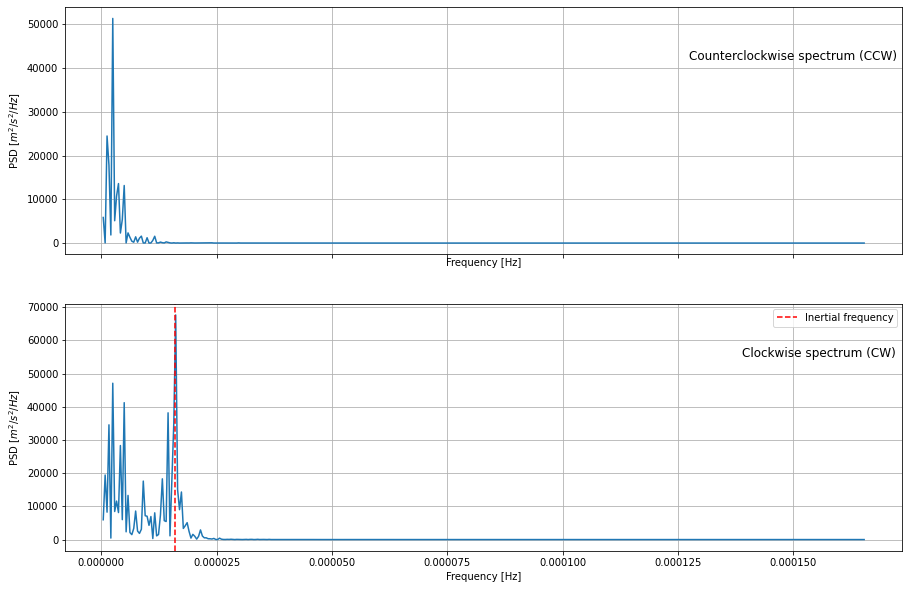

In [285]:
#This plot only shows the first 400 results
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_size_inches(15, 10)

ax1.plot(ff_2w[0:400],P1_2w[0:400])
ax1.set_xlabel('Frequency [Hz]',fontsize=10)
ax1.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.text(0.87, 0.80, "Counterclockwise spectrum (CCW)", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
ax1.grid()


ax2.plot(ff_2w[0:400],P2_2w[0:400])
ax2.set_xlabel('Frequency [Hz]',fontsize=10)
ax2.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax2.text(0.90, 0.80, "Clockwise spectrum (CW)", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
ax2.axvline(x = 1.599e-05, color = 'r',ls='--', label = 'Inertial frequency')
ax2.legend(fontsize=10)
ax2.grid()
ax2.tick_params(labelsize=10)

#plt.savefig('Comp_freq.spectrum_1D_winter.jpg', bbox_inches='tight')

hide_toggle()

#### 5.1.1 eNATL60- First layer

##### Agesotrophic component

In [274]:
Vcomplex_winter_m = Uagw.values+1j*Vagw.values
ff_2wm,P1_2wm = psd1d(hh=Vcomplex_winter_m[0,:],dx=50, tap=0, detrend=True)
ff_2wm,P2_2wm = psd1d(hh=Vcomplex_winter_m[0,:].conjugate() ,dx=50,tap=0, detrend=True)



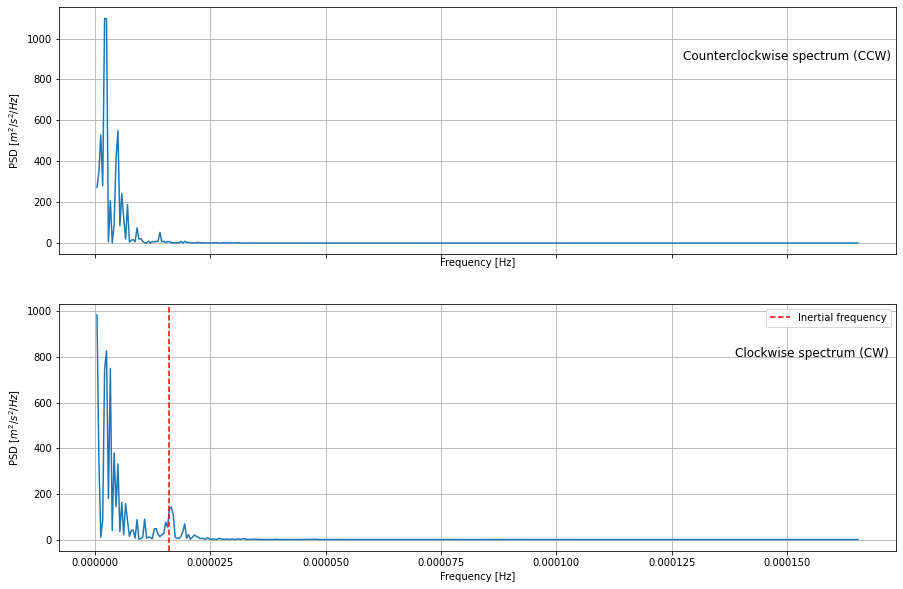

In [281]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_size_inches(15, 10)

ax1.plot(ff_2wm[0:400],P1_2wm[0:400])
ax1.set_xlabel('Frequency [Hz]',fontsize=10)
ax1.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.text(0.87, 0.80, "Counterclockwise spectrum (CCW)", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
ax1.grid()


ax2.plot(ff_2wm[0:400],P2_2wm[0:400])
ax2.set_xlabel('Frequency [Hz]',fontsize=10)
ax2.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax2.text(0.90, 0.80, "Clockwise spectrum (CW)", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
ax2.axvline(x = 1.599e-05, color = 'r',ls='--', label = 'Inertial frequency')
ax2.legend(fontsize=10)
ax2.grid()
ax2.tick_params(labelsize=10)

#plt.savefig('Comp_freq.spectrum_eNATL60_ageostrophic_winter.jpg', bbox_inches='tight')

hide_toggle()

##### Total component

In [286]:
Vcomplext_winter_m = Utw.values+1j*Vtw.values
ff_2twm,P1_2twm = psd1d(hh=Vcomplext_winter_m[0,:],dx=50, tap=0, detrend=True)
ff_2twm,P2_2twm = psd1d(hh=Vcomplext_winter_m[0,:].conjugate() ,dx=50,tap=0, detrend=True)


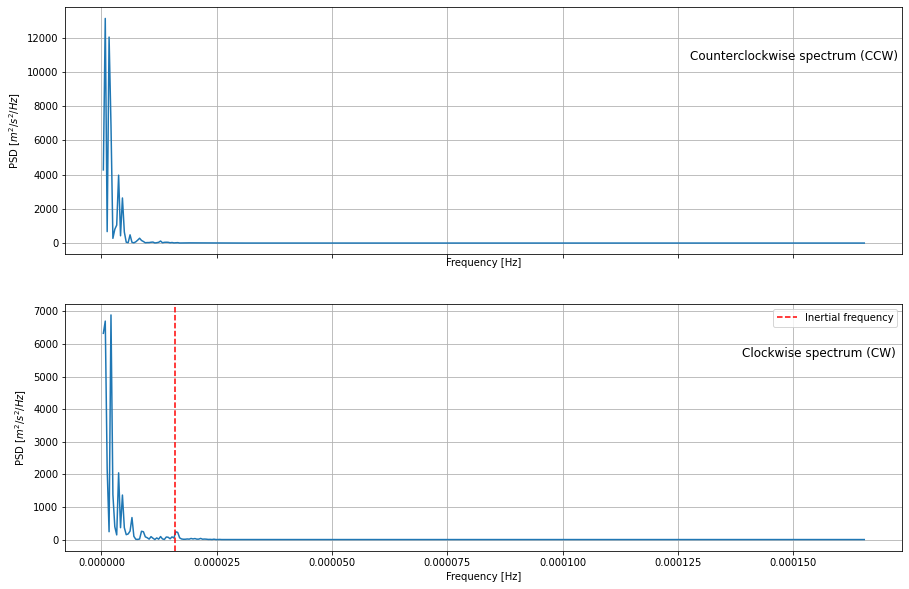

In [287]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_size_inches(15, 10)

ax1.plot(ff_2twm[0:400],P1_2twm[0:400])
ax1.set_xlabel('Frequency [Hz]',fontsize=10)
ax1.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.text(0.87, 0.80, "Counterclockwise spectrum (CCW)", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
ax1.grid()


ax2.plot(ff_2twm[0:400],P2_2twm[0:400])
ax2.set_xlabel('Frequency [Hz]',fontsize=10)
ax2.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax2.text(0.90, 0.80, "Clockwise spectrum (CW)", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
ax2.axvline(x = 1.599e-05, color = 'r',ls='--', label = 'Inertial frequency')
ax2.legend(fontsize=10)
ax2.grid()
ax2.tick_params(labelsize=10)

#plt.savefig('Comp_freq.spectrum_eNATL60_total_winter.jpg', bbox_inches='tight')

hide_toggle()

### 5.2 Summer

#### 5.2.1 1D model- First layer

In [343]:
Ur2.shape

(2, 105408)

In [346]:
Vcomplex_summer = Ur2[:,51840:105399]+1j*Vr2[:,51840:105399]
ff_2s,P1_2s = psd1d(hh=Vcomplex_summer[0,:],dx=50, tap=0, detrend=True)
ff_2s,P2_2s = psd1d(hh=Vcomplex_summer[0,:].conjugate() ,dx=50,tap=0, detrend=True)



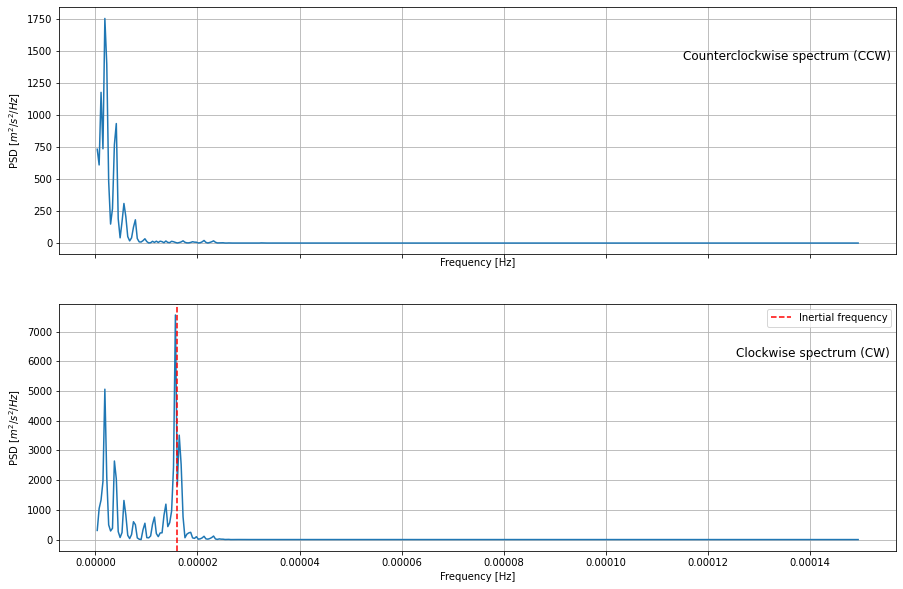

In [347]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_size_inches(15, 10)

ax1.plot(ff_2s[0:400],P1_2s[0:400])
ax1.set_xlabel('Frequency [Hz]',fontsize=10)
ax1.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.text(0.87, 0.80, "Counterclockwise spectrum (CCW)", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
ax1.grid()


ax2.plot(ff_2s[0:400],P2_2s[0:400])
ax2.set_xlabel('Frequency [Hz]',fontsize=10)
ax2.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax2.text(0.90, 0.80, "Clockwise spectrum (CW)", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
ax2.axvline(x = 1.599e-05, color = 'r',ls='--', label = 'Inertial frequency')
ax2.legend(fontsize=10)
ax2.grid()
ax2.tick_params(labelsize=10)

#plt.savefig('Comp_freq.spectrum_1D_summer.jpg', bbox_inches='tight')

hide_toggle()

#### 5.2.2 eNATL60- First layer

##### Agesotrophic component

In [348]:
Vcomplex_summer_m = Uags.values+1j*Vags.values
ff_2sm,P1_2sm = psd1d(hh=Vcomplex_summer_m[0,:],dx=50, tap=0, detrend=True)
ff_2sm,P2_2sm = psd1d(hh=Vcomplex_summer_m[0,:].conjugate() ,dx=50,tap=0, detrend=True)


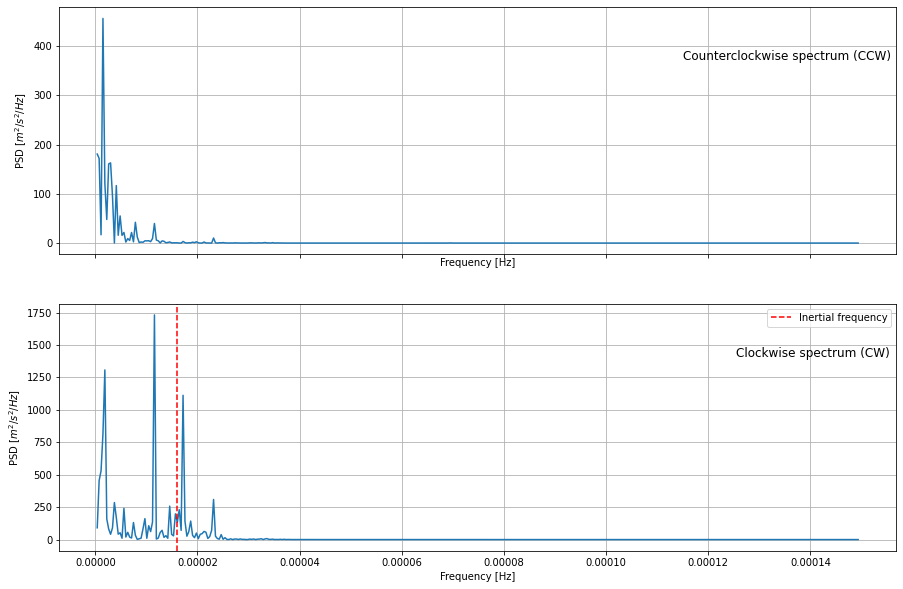

In [349]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_size_inches(15, 10)

ax1.plot(ff_2sm[0:400],P1_2sm[0:400])
ax1.set_xlabel('Frequency [Hz]',fontsize=10)
ax1.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.text(0.87, 0.80, "Counterclockwise spectrum (CCW)", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
ax1.grid()


ax2.plot(ff_2sm[0:400],P2_2sm[0:400])
ax2.set_xlabel('Frequency [Hz]',fontsize=10)
ax2.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax2.text(0.90, 0.80, "Clockwise spectrum (CW)", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
ax2.axvline(x = 1.599e-05, color = 'r',ls='--', label = 'Inertial frequency')
ax2.legend(fontsize=10)
ax2.grid()
ax2.tick_params(labelsize=10)

#plt.savefig('Comp_freq.spectrum_eNATL60_ageostrophic_summer.jpg', bbox_inches='tight')

hide_toggle()

##### Total component

In [350]:
Vcomplext_summer_m = Uts.values+1j*Vts.values
ff_2tsm,P1_2tsm = psd1d(hh=Vcomplext_summer_m[0,:],dx=50, tap=0, detrend=True)
ff_2tsm,P2_2tsm = psd1d(hh=Vcomplext_summer_m[0,:].conjugate() ,dx=50,tap=0, detrend=True)

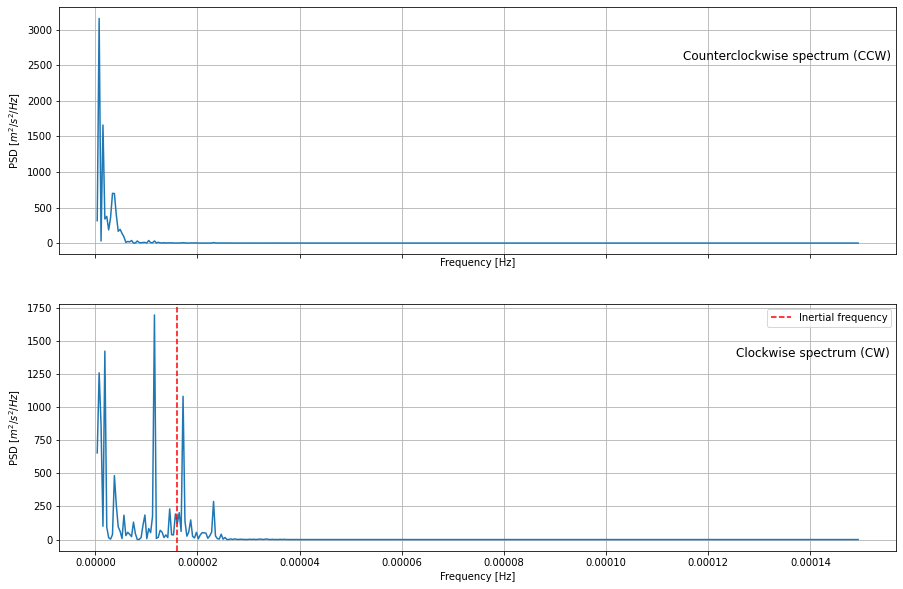

In [351]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_size_inches(15, 10)

ax1.plot(ff_2tsm[0:400],P1_2tsm[0:400])
ax1.set_xlabel('Frequency [Hz]',fontsize=10)
ax1.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.text(0.87, 0.80, "Counterclockwise spectrum (CCW)", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
ax1.grid()


ax2.plot(ff_2tsm[0:400],P2_2tsm[0:400])
ax2.set_xlabel('Frequency [Hz]',fontsize=10)
ax2.set_ylabel('PSD $[m^2/s^2/Hz]$',fontsize=10)
ax2.text(0.90, 0.80, "Clockwise spectrum (CW)", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
ax2.axvline(x = 1.599e-05, color = 'r',ls='--', label = 'Inertial frequency')
ax2.legend(fontsize=10)
ax2.grid()
ax2.tick_params(labelsize=10)

#plt.savefig('Comp_freq.spectrum_eNATL60_total_summer.jpg', bbox_inches='tight')

hide_toggle()

## 6. COMPARISONS

### 6.1 Amplitudes

In [120]:
def plot_complex(cols,rows,U,V,gtime,ti,tf,heights):

    """This function allows to get the plots of the relation abs(U+iV) to compute the mean time
    • cols: number of cols desired in the plot
    • rows: number of rows desired in the plot
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation
    • ti,tf: Desired visualization time
    • layers_vector: The vector that contains the desired layers to plot"""

    fig, ax = plt.subplots(rows, cols, figsize=(10,10))
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.2, hspace = 0.6)
    fig.set_size_inches(20, 20)
                       
    if cols == 1:
        axm = ax[:,None]
    else: 
        axm = ax
    
    for row in range(rows):

        for col in range(cols):
            im1 = axm[row, col].plot(gtime[ti:tf], np.abs(U[(row+col+(row*(cols-1))),ti:tf]+(1j*V[(row+col+(row*(cols-1))),0:time])), lw=1.5, label='U+iV')
            axm[row, col].grid('on')
            axm[row, col].set_ylabel('U+iV (m/s)', fontsize=20)
            axm[row, col].set_xlabel('time (days)', fontsize=20)
            axm[row, col].tick_params(axis='y')
            axm[row, col].tick_params(labelsize=18)
            axm[row, col].legend(fontsize=14)
            axm[row, col].set_title("Height: {:.2f} m ".format(heights[(row+col+(row*(cols-1)))]))
            


def plot_complex_layer(U,V,gtime,ti,tf,heights,layers_vector):

    """This function allows to get the plots of the relation abs(U+iV) to compute the mean time for the 
    desire layers
    • U,V: U and V vectors result of the 1D model
    • gtime: vector that contains all the time steps of the simulation
    • ti,tf: Desired visualization time
    • heights: vector that contains the heigth or level at which the velocities were computed
    • layer1,layer2,layer3,layer4: desire layers to plot"""
    
    fig, ax = plt.subplots(len(layers_vector),1,figsize=(3,5))
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.7, hspace = 0.8)
    fig.set_size_inches(20,20)                  
    
    for j,l in enumerate(layers_vector):
    
        im1 = ax[j].plot(gtime[ti:tf], np.abs(U[l,ti:tf]+(1j*V[l,ti:tf])), lw=1.5, label='|U+iV|')
        ax[j].grid('on')
        ax[j].set_ylabel('|U+iV|', fontsize=20)
        ax[j].set_xlabel('time (days)', fontsize=20)
        ax[j].tick_params(axis='y')
        ax[j].tick_params(labelsize=18)
        ax[j].legend(fontsize=14)
        ax[j].set_title("Height: {:.2f} m ".format(heights[l]), fontsize=21)


            
            
def plot_complex_layer_comp(Wind,List_comp,List_names,gtime,ti,tf,heights,layers_vector):

    """This function allows to get the plots of the relation abs(U+iV) to compute the mean time for the 
    desire layers
    • Wind: vector that contains the wind values
    • List_comp: list that contains the fields to compare
    • List_names: list of fields' names
    • gtime: vector that contains all the time steps of the simulation
    • ti,tf: Desired visualization time
    • heights: vector that contains the heigth or level at which the velocities were computed
    • layer1,layer2,layer3,layer4: desire layers to plot"""
    
    #Define the ratios for the graph according to the number of plots
    ratios= []
    ratios.append(0.4)
    for i in range(1,len(layers_vector)+1):
        ratios.append(1)
   

    fig, ax = plt.subplots(len(layers_vector)+1,1,sharex=True,gridspec_kw={'height_ratios': ratios})
    fig.subplots_adjust(left = 1, bottom = 5, right = 2, top = 6, wspace = 0.7, hspace = 0.2)
    fig.set_size_inches(20,20)                  
    
    #Plot wind vector
    im0 = ax[0].plot(gtime[ti:tf], Wind[ti:tf] ,color="black", lw=1.5)
    ax[0].grid('on')
    ax[0].set_ylabel('$\parallel U_{10}\parallel$ [m/s]', fontsize=20)
    ax[0].set_xlabel('', fontsize=20)
    ax[0].tick_params(axis='y')
    ax[0].tick_params(labelsize=18)
    
    #Plot other fields for comparison
    for j,l in enumerate(layers_vector):
        array_r = List_comp[0]
        im1 = ax[j+1].plot(gtime[ti:tf], array_r[l,ti:tf] , lw=3.2, label=List_names[0])
        for i,n in enumerate(List_comp[1::]):
            array = n
            im1 = ax[j+1].plot(gtime[ti:tf], array[l,ti:tf] , lw=1.7, label=List_names[i+1])
            ax[j+1].grid('on')
            ax[j+1].set_ylabel('Amplitude ($|U+iV|$) [m/s]', fontsize=20)
            ax[j+1].set_xlabel('', fontsize=20)
            ax[j+1].tick_params(axis='y')
            ax[j+1].tick_params(labelsize=18)
            ax[j+1].legend(fontsize=15)
            ax[j+1].text(0.08, 1.03, "Height: {:.2f} m ".format(heights[l]), horizontalalignment='center', verticalalignment='center', transform=ax[j+1].transAxes, fontsize=20)
            #ax[j+1].set_title("Height: {:.2f} m ".format(heights[l]), fontsize=21)
print('Function to plot |U+iV| (magnitude) for each layer, specific given layers, and comparisons')

hide_toggle()

Function to plot |U+iV| (magnitude) for each layer, specific given layers, and comparisons


#### 6.1.1 Winter

In [352]:
#Select of data for February to do comparisons
U1w_feb = Ur1[:,53568::]
V1w_feb = Vr1[:,53568::]
W1w_feb = np.sqrt((U1w_feb**2)+(V1w_feb**2))

In [222]:
Complexw_ag = np.abs(Uagw.values+1j*Vagw.values)
Complexw_feb = np.abs(U1w_feb+1j*V1w_feb)

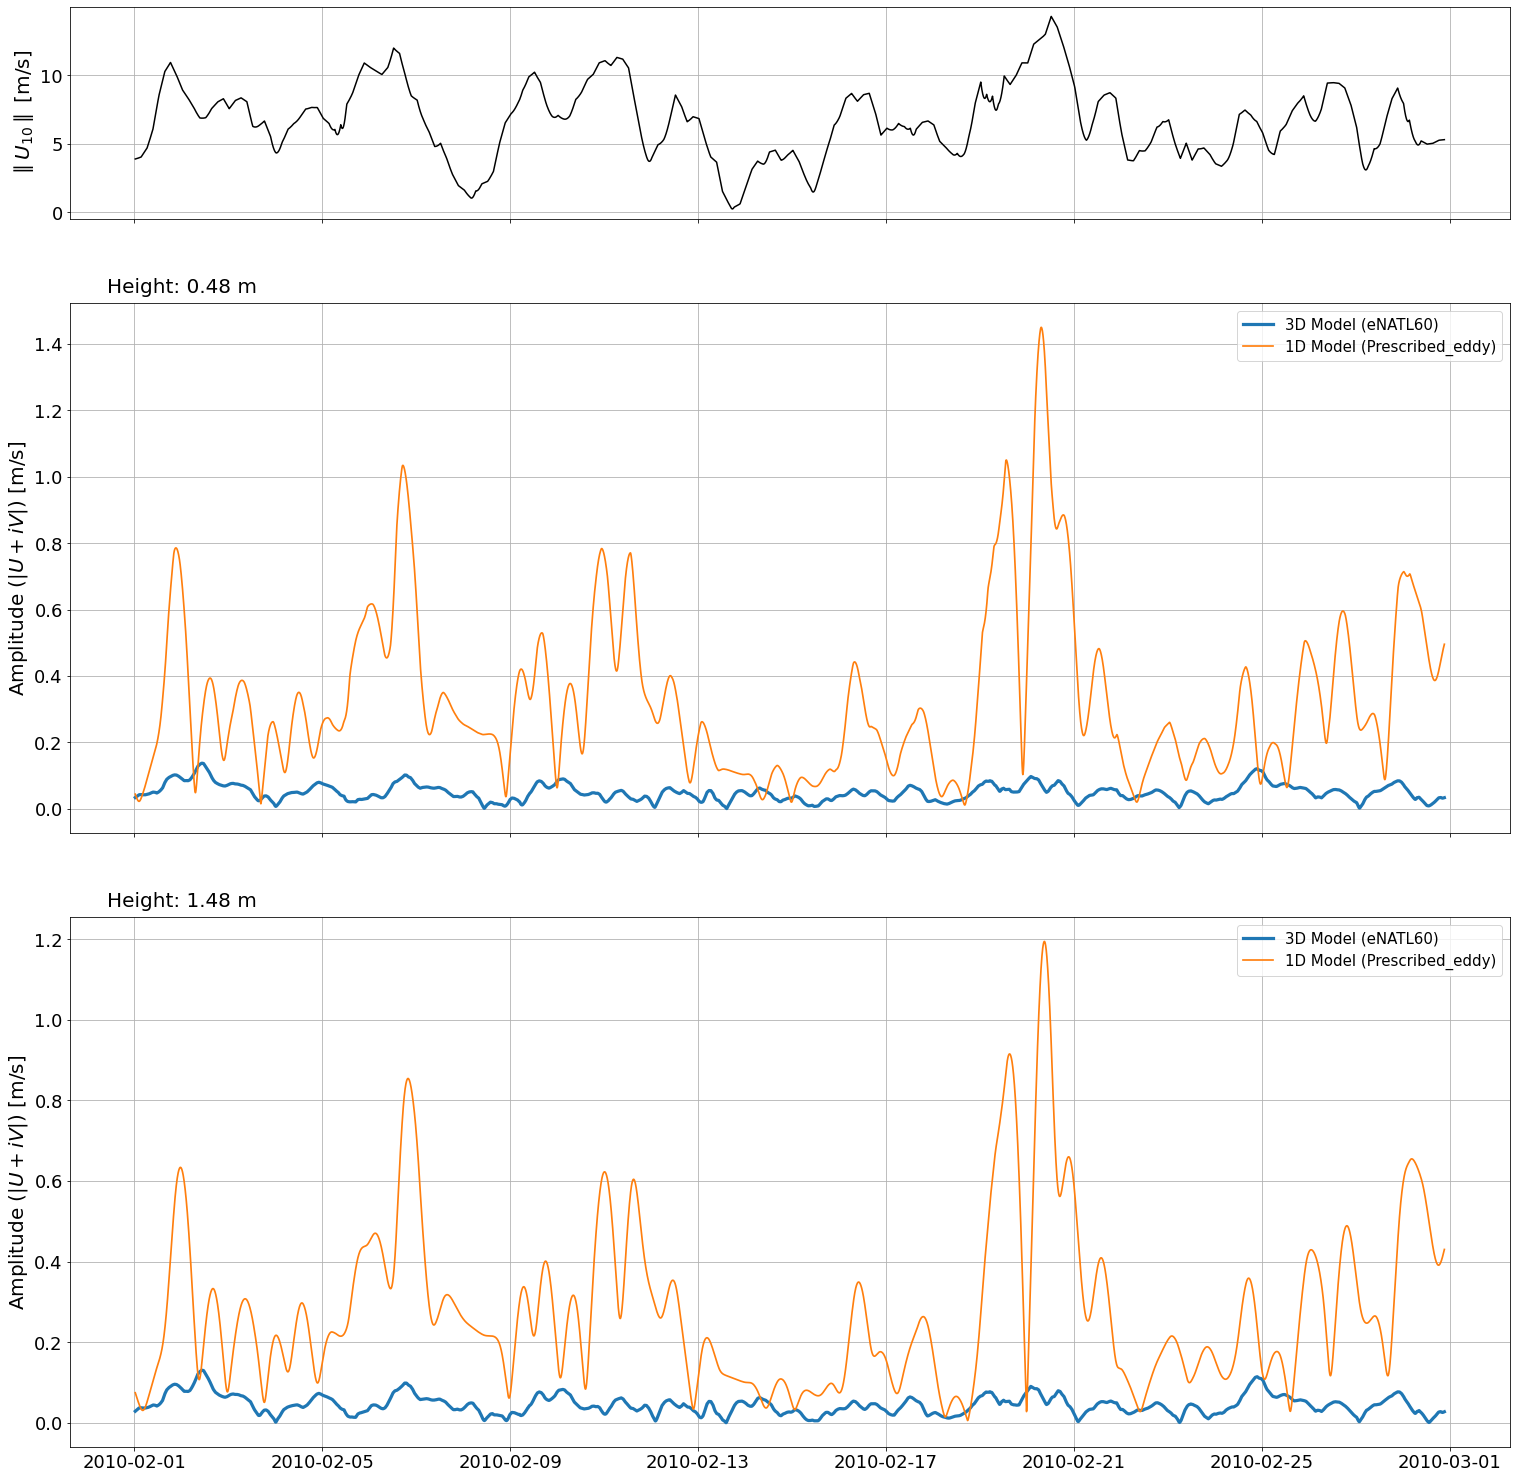

In [375]:
fieldsw_comp = [Complexw_ag, Complexw_feb]
fieldsw_name = ['3D Model (eNATL60)', '1D Model (Prescribed_eddy)']

time_wpr = np.array(U10wp.time_counter[0:len(U10wp.time_counter)-1]-(25567*86400),dtype=np.datetime64) #Setting time in dates for results from 1D model

plot_complex_layer_comp(W10wp,fieldsw_comp,fieldsw_name,time_wpr,0,48383,z1,layers_p)

#### 6.1.2 Summer

In [376]:
#Select of data for July to do comparisons
U2s_jul = Ur2[:,51840::]
V2s_jul = Vr2[:,51840::]
W2s_jul = np.sqrt((U1s_jul**2)+(V1s_jul**2))

In [377]:
Complexs_jul.shape
Complexs_ag.shape

(302, 53568)

In [378]:
Complexs_ag = np.abs(Uags.values+1j*Vags.values)
Complexs_jul = np.abs(U2s_jul+1j*V2s_jul)

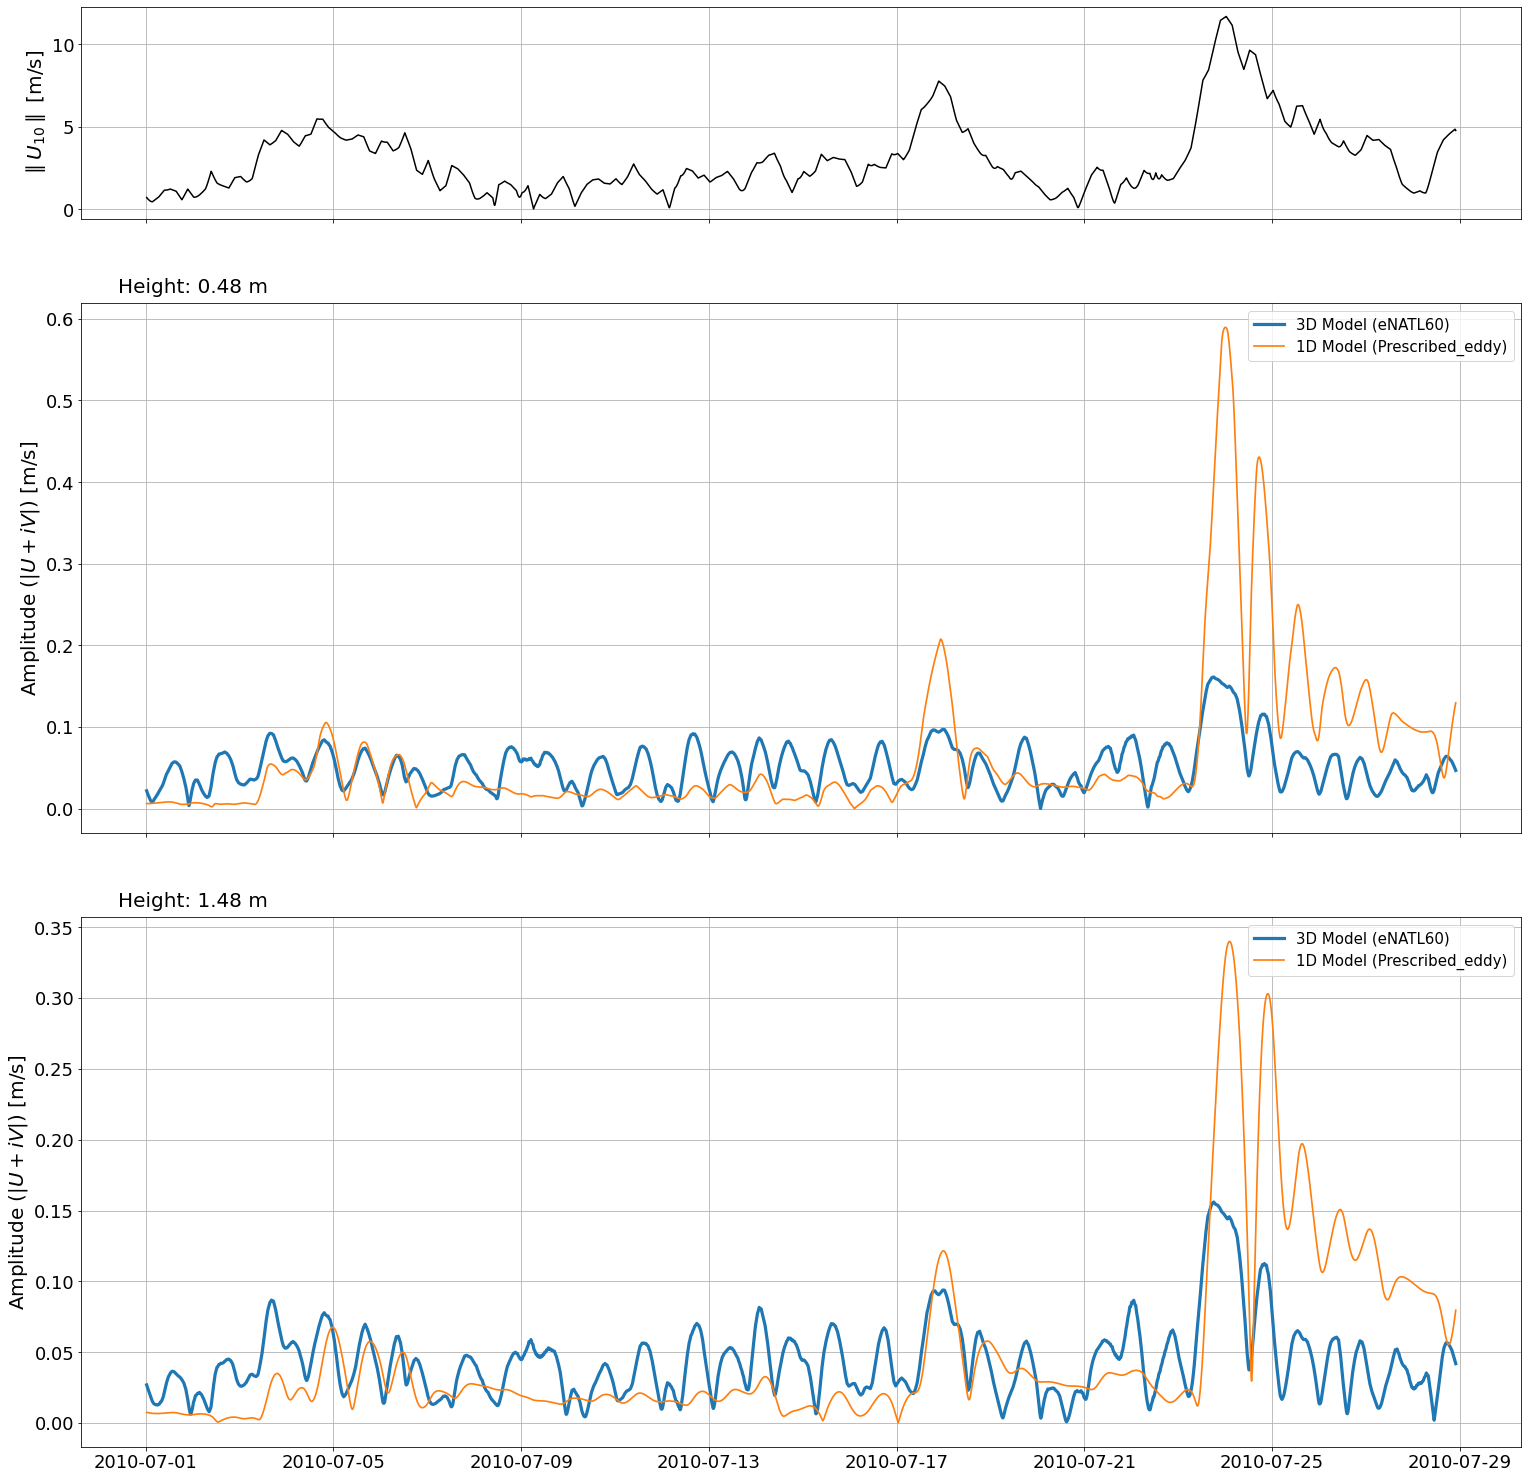

In [379]:
fieldss_comp = [Complexs_ag, Complexs_jul]
fieldss_name = ['3D Model (eNATL60)', '1D Model (Prescribed_eddy)']

time_spr = np.array(U10sp.time_counter[0:len(U10sp.time_counter)-1]-(25567*86400),dtype=np.datetime64) #Setting time in dates for results from 1D model

plot_complex_layer_comp(W10sp,fieldss_comp,fieldss_name,time_spr,0,48383,z2,layers_p)